In [1]:
# Importing packages
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
#Read train and test data
data_train = pd.read_csv("train (1).csv")
data_train.head()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
0,0,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,31.277,87.009,7.527,48.58,124.38,1.29,32.24,96.68,2.33,0.00,0.0,0.0,0.00,0.0,0.00,2.23,0.00,0.28,5.29,16.04,2.33,0.00,0.00,0.00,0.00,0.00,0.00,7.53,16.04,2.61,46.34,124.38,1.01,18.75,80.61,0.0,0.00,0.0,0.0,0.0,0.0,0.0,65.09,204.99,1.01,0.0,0.0,0.0,8.20,0.63,0.00,0.38,0.0,0.0,81.21,221.68,3.63,2.43,3.68,7.79,0.83,21.08,16.91,0.00,0.00,0.00,3.26,24.76,24.71,0.00,7.61,0.21,7.46,19.96,14.96,0.0,0.0,0.0,0.0,0.0,0.0,7.46,27.58,15.18,11.84,53.04,40.56,0.0,0.0,0.66,0.0,0.0,0.0,1.11,0.69,0.00,3,2,2,77,65,10,65,65,10,6/22/2014,7/10/2014,8/24/2014,65,65,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.00,0.00,0.0,0.00,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1958,0.0,0.0,0.0,0
1,1,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,0.000,122.787,42.953,0.00,0.00,0.00,0.00,25.99,30.89,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,22.01,29.79,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,30.73,31.66,0.00,0.0,0.0,0.00,30.73,31.66,1.68,19.09,10.53,1.41,18.68,11.09,0.35,1.66,3.40,3.44,39.44,25.03,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,3.44,39.44,25.04,0.0,0.0,0.01,0.0,0.0,0.0,0.00,0.00,0.00,3,4,5,0,145,50,0,145,50,6/12/2014,7/10/2014,8/26/2014,0,0,0,NaN,7/8/2014,NaN,NaN,1.0,NaN,NaN,145.0,NaN,NaN,0.0,NaN,NaN,1.0,NaN,Na

In [3]:
data_train.shape

(69999, 172)

In [4]:
data_test = pd.read_csv("test (1).csv")
data_test.head()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g
0,69999,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,91.882,65.330,64.445,31.78,20.23,23.11,60.16,32.16,34.83,0.00,0.00,0.00,0.00,0.00,0.00,24.88,20.23,21.06,18.13,10.89,8.36,0.00,13.58,0.00,0.0,0.00,0.03,43.01,44.71,29.43,6.90,0.00,2.05,42.03,7.68,26.43,0.0,0.0,0.0,0.0,0.0,0.0,48.93,7.68,28.48,0.0,0.0,0.0,0.00,0.00,0.03,0.0,0.0,0.0,91.94,52.39,57.94,30.33,37.56,21.98,10.21,4.59,9.53,0.26,0.00,0.00,40.81,42.16,31.51,0.00,0.00,0.00,0.36,1.04,4.34,0.0,0.0,0.00,0.0,0.0,0.0,0.36,1.04,4.34,41.73,43.56,36.26,0.54,0.34,0.39,0.00,0.00,0.00,0.0,0.0,0.00,5,5,4,103,90,60,50,30,30,6/21/2014,7/26/2014,8/24/2014,30,30,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1692,0.00,0.00,0.00
1,70000,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,414.168,515.568,360.868,75.51,41.21,19.84,474.34,621.84,394.94,0.00,0.00,0.00,0.00,0.00,0.00,75.51,41.21,19.84,473.61,598.08,377.26,0.73,0.00,0.00,0.0,0.00,0.00,549.86,639.29,397.11,0.00,0.00,0.00,0.00,23.76,17.68,0.0,0.0,0.0,0.0,0.0,0.0,0.00,23.76,17.68,0.0,0.0,0.8,0.00,0.00,0.00,0.0,0.0,0.0,549.86,663.06,415.59,19.99,26.95,2.61,160.19,122.29,184.81,1.49,0.00,0.00,181.69,149.24,187.43,0.00,0.00,0.00,0.00,12.51,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.00,12.51,0.00,296.33,339.64,281.66,0.00,0.00,0.00,114.63,177.88,94.23,0.0,0.0,0.00,5,4,5,500,500,500,250,250,250,6/19/2014,7/16/2014,8/24/2014,250,0,0,NaN,NaN,Na

In [5]:
data_test.shape

(30000, 171)

In [6]:
data_train.select_dtypes(include=['object']).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   last_date_of_month_6      69999 non-null  object
 1   last_date_of_month_7      69600 non-null  object
 2   last_date_of_month_8      69266 non-null  object
 3   date_of_last_rech_6       68898 non-null  object
 4   date_of_last_rech_7       68765 non-null  object
 5   date_of_last_rech_8       67538 non-null  object
 6   date_of_last_rech_data_6  17568 non-null  object
 7   date_of_last_rech_data_7  17865 non-null  object
 8   date_of_last_rech_data_8  18417 non-null  object
dtypes: object(9)
memory usage: 4.8+ MB


In [7]:
data_train.select_dtypes(include=['number']).info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Data columns (total 163 columns):
 #    Column              Dtype  
---   ------              -----  
 0    id                  int64  
 1    circle_id           int64  
 2    loc_og_t2o_mou      float64
 3    std_og_t2o_mou      float64
 4    loc_ic_t2o_mou      float64
 5    arpu_6              float64
 6    arpu_7              float64
 7    arpu_8              float64
 8    onnet_mou_6         float64
 9    onnet_mou_7         float64
 10   onnet_mou_8         float64
 11   offnet_mou_6        float64
 12   offnet_mou_7        float64
 13   offnet_mou_8        float64
 14   roam_ic_mou_6       float64
 15   roam_ic_mou_7       float64
 16   roam_ic_mou_8       float64
 17   roam_og_mou_6       float64
 18   roam_og_mou_7       float64
 19   roam_og_mou_8       float64
 20   loc_og_t2t_mou_6    float64
 21   loc_og_t2t_mou_7    float64
 22   loc_og_t2t_mou_8    float64
 23   loc_og_t2m_mou_6    float64
 24   

In [8]:
data_train.describe()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
count,69999.000000,69999.0,69297.0,69297.0,69297.0,69999.000000,69999.000000,69999.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.0,67312.0,66296.0,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,69999.000000,69999.000000,69999.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.0,67312.0,66296.0,67231.000000,67312.000000,66296.000000,69999.000000,69999.000000,69999.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000,69999.000000,69999.000000

In [9]:
#EDA process

#Checking Percentage of null|na values in column
(((data_train.isnull() | data_train.isna()).sum() * 100) / data_train.index.size).loc[lambda x : x>0].sort_values(ascending=False)

max_rech_data_6             74.902499
fb_user_6                   74.902499
date_of_last_rech_data_6    74.902499
av_rech_amt_data_6          74.902499
night_pck_user_6            74.902499
count_rech_2g_6             74.902499
total_rech_data_6           74.902499
arpu_2g_6                   74.902499
count_rech_3g_6             74.902499
arpu_3g_6                   74.902499
arpu_3g_7                   74.478207
count_rech_2g_7             74.478207
av_rech_amt_data_7          74.478207
max_rech_data_7             74.478207
total_rech_data_7           74.478207
arpu_2g_7                   74.478207
date_of_last_rech_data_7    74.478207
night_pck_user_7            74.478207
fb_user_7                   74.478207
count_rech_3g_7             74.478207
total_rech_data_8           73.689624
max_rech_data_8             73.689624
date_of_last_rech_data_8    73.689624
count_rech_2g_8             73.689624
fb_user_8                   73.689624
arpu_3g_8                   73.689624
count_rech_3

In [10]:
#Checking data in columns having null values
for i in data_train.columns:
    print(i,data_train[i].unique())

id [    0     1     2 ... 69996 69997 69998]
circle_id [109]
loc_og_t2o_mou [ 0. nan]
std_og_t2o_mou [ 0. nan]
loc_ic_t2o_mou [ 0. nan]
last_date_of_month_6 ['6/30/2014']
last_date_of_month_7 ['7/31/2014' nan]
last_date_of_month_8 ['8/31/2014' nan]
arpu_6 [ 31.277   0.     60.806 ... 372.088 238.575 168.269]
arpu_7 [ 87.009 122.787 103.176 ... 258.374 245.414  42.815]
arpu_8 [  7.527  42.953   0.    ... 279.782 145.062 167.961]
onnet_mou_6 [ 48.58   0.     0.53 ... 486.49 399.01 116.54]
onnet_mou_7 [124.38   0.    15.93 ... 453.83 378.21 283.63]
onnet_mou_8 [  1.29   0.     6.13 ... 458.79 380.99 232.63]
offnet_mou_6 [ 32.24   0.    53.99 ... 617.98 360.88 575.46]
offnet_mou_7 [ 96.68  25.99  82.05 ... 772.53 645.89 236.61]
offnet_mou_8 [  2.33  30.89   0.   ...  79.16 783.66 263.84]
roam_ic_mou_6 [  0.    53.64  28.26 ... 221.03  48.39 377.24]
roam_ic_mou_7 [  0.    11.31   7.23 ...  64.53 189.64  37.41]
roam_ic_mou_8 [  0.    47.81   3.46 ... 199.44  51.84 506.26]
roam_og_mou_6 [  0.

loc_ic_t2t_mou_7 [  3.68  19.09   6.16 ... 378.58 174.98 212.36]
loc_ic_t2t_mou_8 [  7.79  10.53   6.49 ... 159.63 114.93  79.34]
loc_ic_t2m_mou_6 [  0.83   1.41  89.86 ... 326.73 270.69 548.33]
loc_ic_t2m_mou_7 [ 21.08  18.68  25.18 ... 315.53 224.04 361.33]
loc_ic_t2m_mou_8 [ 16.91  11.09  23.51 ... 199.56 376.59 224.98]
loc_ic_t2f_mou_6 [  0.     0.35   7.23 ... 105.14  91.13 339.11]
loc_ic_t2f_mou_7 [  0.     1.66   0.81 ...  52.41  70.04 236.16]
loc_ic_t2f_mou_8 [  0.     3.4    6.14 ... 108.84  70.61 147.74]
loc_ic_mou_6 [  3.26   3.44  94.38 ... 578.68  97.24 529.48]
loc_ic_mou_7 [ 24.76  39.44  31.34 ... 548.26 270.41 334.09]
loc_ic_mou_8 [ 24.71  25.03  30.01 ... 367.01 257.76 412.01]
std_ic_t2t_mou_6 [  0.    11.69   3.58 ...  53.03 182.64  40.93]
std_ic_t2t_mou_7 [  7.61   0.     4.34 ...  56.03  62.98 283.79]
std_ic_t2t_mou_8 [  0.21   0.     2.95 ...  33.53 164.66  65.14]
std_ic_t2m_mou_6 [  7.46   0.    18.21 ... 148.74  34.34 144.89]
std_ic_t2m_mou_7 [ 19.96   0.     2.4

av_rech_amt_data_8 [       nan 1.4200e+02 1.9800e+02 1.5400e+02 2.3000e+01 2.1400e+02
 2.5200e+02 4.2700e+02 4.1000e+01 3.0400e+02 5.9000e+01 3.0800e+02
 1.2500e+02 5.0400e+02 5.1000e+01 9.8000e+01 4.0400e+02 8.7000e+01
 1.4900e+02 4.2400e+02 9.4000e+01 6.4000e+01 2.5000e+01 3.5800e+02
 4.9000e+01 7.3000e+01 3.2400e+02 1.0000e+02 2.5000e+02 6.9000e+01
 5.0000e+01 1.3800e+02 7.0000e+01 1.7000e+01 5.6000e+01 4.8000e+01
 1.9500e+02 3.1300e+02 4.0600e+02 3.4600e+02 4.4900e+02 1.5000e+02
 1.4500e+02 1.7900e+02 5.4500e+01 2.7400e+02 2.0000e+02 3.5000e+02
 4.5000e+02 1.7500e+02 2.1800e+02 7.1000e+01 6.7000e+01 2.6000e+02
 9.2000e+01 7.5000e+01 1.1500e+02 4.6600e+02 2.7500e+02 1.5900e+02
 3.6700e+02 1.8200e+02 8.0000e+00 3.8100e+02 2.0400e+02 4.6000e+01
 3.3000e+01 3.2600e+02 3.2900e+02 2.2000e+01 5.0500e+02 4.3400e+02
 1.3000e+01 9.5100e+02 1.0800e+02 3.4700e+02 1.3000e+02 4.9500e+01
 2.2700e+02 1.0100e+02 2.8700e+02 3.2800e+02 9.1000e+01 7.5600e+02
 2.9000e+02 3.7700e+02 1.4800e+02 2.2900e+0

In [11]:
data_train.max()

id                          69998
circle_id                     109
loc_og_t2o_mou                0.0
std_og_t2o_mou                0.0
loc_ic_t2o_mou                0.0
last_date_of_month_6    6/30/2014
arpu_6                  27731.088
arpu_7                  35145.834
arpu_8                  33543.624
onnet_mou_6               7376.71
onnet_mou_7               8157.78
onnet_mou_8              10752.56
offnet_mou_6              8362.36
offnet_mou_7              7043.98
offnet_mou_8             14007.34
roam_ic_mou_6             2850.98
roam_ic_mou_7             4155.83
roam_ic_mou_8             4169.81
roam_og_mou_6             3775.11
roam_og_mou_7             2812.04
roam_og_mou_8             5337.04
loc_og_t2t_mou_6          6431.33
loc_og_t2t_mou_7          7400.66
loc_og_t2t_mou_8         10752.56
loc_og_t2m_mou_6          4696.83
loc_og_t2m_mou_7          4557.14
loc_og_t2m_mou_8          4961.33
loc_og_t2f_mou_6           617.58
loc_og_t2f_mou_7           815.33
loc_og_t2f_mou

In [12]:
print(data_train.id.duplicated().sum()) #checking if any duplicate rows based on id column

0


In [13]:
#Dropping columns which has all values 0
drop_0_columns = ['loc_og_t2o_mou','std_og_t2o_mou','loc_ic_t2o_mou','std_og_t2c_mou_6',
                  'std_og_t2c_mou_7','std_og_t2c_mou_8','std_ic_t2o_mou_6',
                 'std_ic_t2o_mou_7','std_ic_t2o_mou_8']
data_train.drop(drop_0_columns,axis=1,inplace = True)
data_test.drop(drop_0_columns,axis=1,inplace = True)

In [14]:
#fill 0 to nan value
fill_0_columns = data_train.select_dtypes(include=['number']).columns
data_train[fill_0_columns] = data_train[fill_0_columns].fillna(0)

In [15]:
fill_0_columns = data_test.select_dtypes(include=['number']).columns

data_test[fill_0_columns] = data_test[fill_0_columns].fillna(0)

In [16]:
for i in data_train.select_dtypes(include=['object']).columns:
    print(i,data_train[i].unique())

last_date_of_month_6 ['6/30/2014']
last_date_of_month_7 ['7/31/2014' nan]
last_date_of_month_8 ['8/31/2014' nan]
date_of_last_rech_6 ['6/22/2014' '6/12/2014' '6/11/2014' '6/15/2014' '6/25/2014' '6/30/2014'
 '6/29/2014' '6/20/2014' '6/28/2014' '6/27/2014' '6/26/2014' '6/19/2014'
 '6/23/2014' '6/24/2014' '6/14/2014' nan '6/5/2014' '6/8/2014' '6/6/2014'
 '6/16/2014' '6/13/2014' '6/18/2014' '6/21/2014' '6/17/2014' '6/10/2014'
 '6/7/2014' '6/2/2014' '6/1/2014' '6/3/2014' '6/9/2014' '6/4/2014']
date_of_last_rech_7 ['7/10/2014' '7/22/2014' '7/21/2014' '7/26/2014' '7/27/2014' '7/19/2014'
 '7/30/2014' '7/16/2014' '7/31/2014' '7/20/2014' '7/25/2014' '7/29/2014'
 '7/28/2014' nan '7/7/2014' '7/18/2014' '7/13/2014' '7/17/2014'
 '7/12/2014' '7/24/2014' '7/15/2014' '7/1/2014' '7/23/2014' '7/9/2014'
 '7/8/2014' '7/14/2014' '7/5/2014' '7/4/2014' '7/11/2014' '7/6/2014'
 '7/2/2014' '7/3/2014']
date_of_last_rech_8 ['8/24/2014' '8/26/2014' '8/25/2014' '8/30/2014' '8/28/2014' '8/19/2014'
 '8/5/2014' '8/27/2

In [17]:
data_train['last_date_of_month_7'] = data_train['last_date_of_month_7'].fillna('7/31/2014')
data_train['last_date_of_month_8'] = data_train['last_date_of_month_8'].fillna('8/31/2014')
data_train['date_of_last_rech_6'] = data_train['date_of_last_rech_6'].fillna('6/30/2014')
data_train['date_of_last_rech_7'] = data_train['date_of_last_rech_7'].fillna('7/31/2014')
data_train['date_of_last_rech_8'] = data_train['date_of_last_rech_8'].fillna('8/31/2014')
data_train['date_of_last_rech_data_6'] = data_train['date_of_last_rech_data_6'].fillna('6/30/2014')
data_train['date_of_last_rech_data_7'] = data_train['date_of_last_rech_data_7'].fillna('7/31/2014')
data_train['date_of_last_rech_data_8'] = data_train['date_of_last_rech_data_8'].fillna('8/31/2014')

data_test['last_date_of_month_7'] = data_test['last_date_of_month_7'].fillna('7/31/2014')
data_test['last_date_of_month_8'] = data_test['last_date_of_month_8'].fillna('8/31/2014')
data_test['date_of_last_rech_6'] = data_test['date_of_last_rech_6'].fillna('6/30/2014')
data_test['date_of_last_rech_7'] = data_test['date_of_last_rech_7'].fillna('7/31/2014')
data_test['date_of_last_rech_8'] = data_test['date_of_last_rech_8'].fillna('8/31/2014')
data_test['date_of_last_rech_data_6'] = data_test['date_of_last_rech_data_6'].fillna('6/30/2014')
data_test['date_of_last_rech_data_7'] = data_test['date_of_last_rech_data_7'].fillna('7/31/2014')
data_test['date_of_last_rech_data_8'] = data_test['date_of_last_rech_data_8'].fillna('8/31/2014')

In [18]:
#dropping 2 columns since thier data is not significant and all are unique values
data_train.drop(['circle_id'],axis=1,inplace=True)

data_test.drop(['circle_id'],axis=1,inplace=True)

In [19]:
data_train.shape

(69999, 162)

In [20]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Columns: 162 entries, id to churn_probability
dtypes: float64(126), int64(27), object(9)
memory usage: 86.5+ MB


0    89.81
1    10.19
Name: churn_probability, dtype: float64


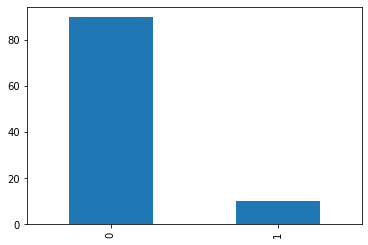

In [21]:
##Univariate Variables Starts

# target column is churn_probability we will start analysis
print(round(data_train.churn_probability.value_counts()*100/len(data_train),2))
round(data_train.churn_probability.value_counts()*100/len(data_train),2).plot.bar()
plt.show()
#Observation :
#89% is 0 churn probability
#10* is 1 churn probability

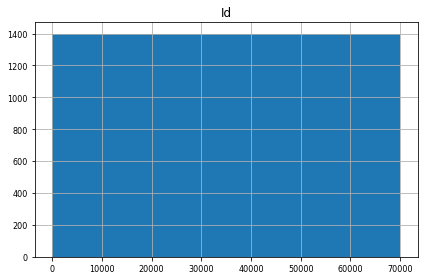

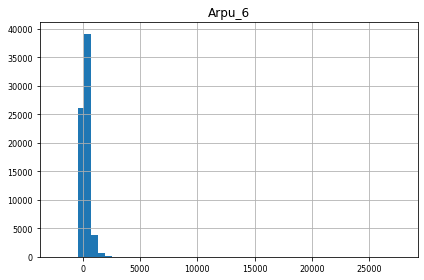

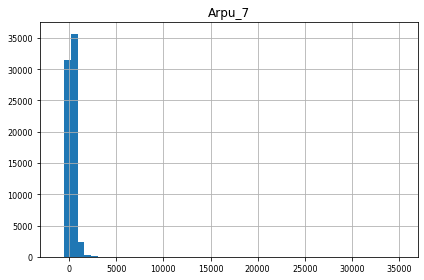

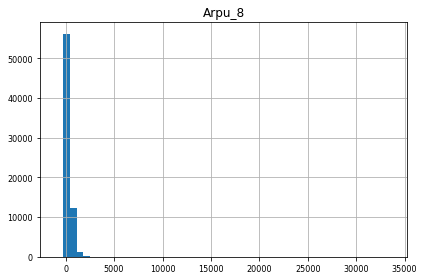

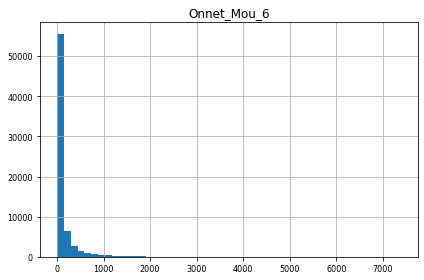

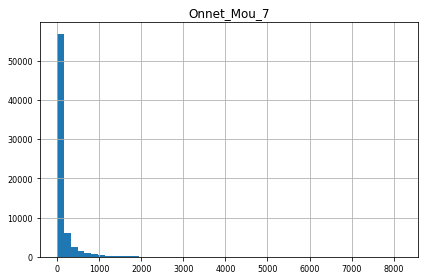

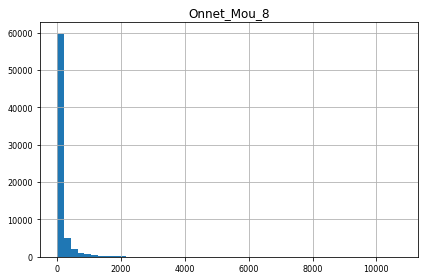

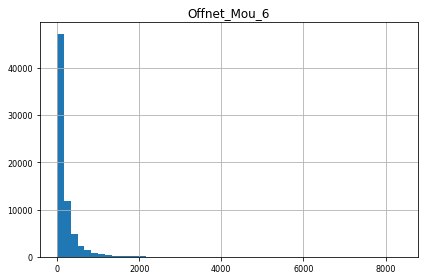

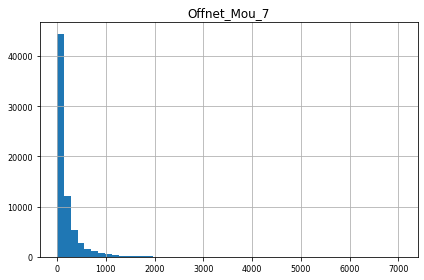

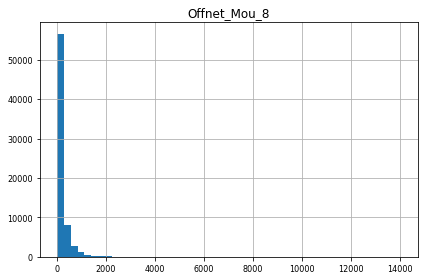

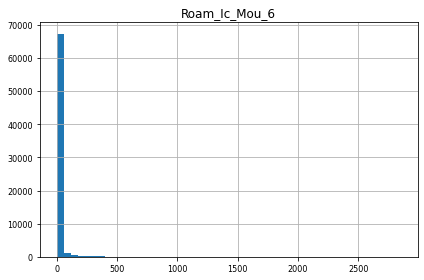

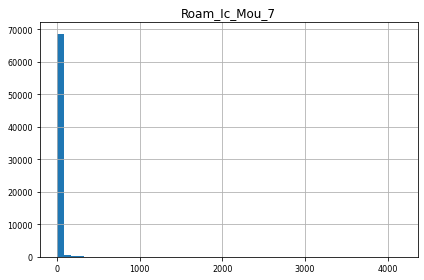

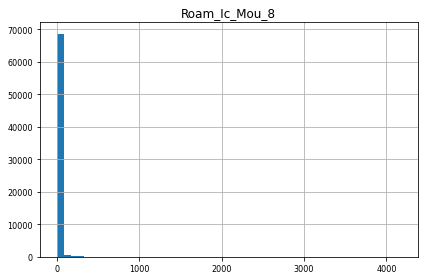

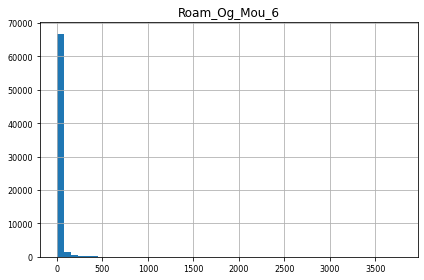

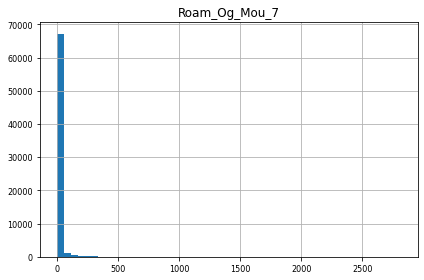

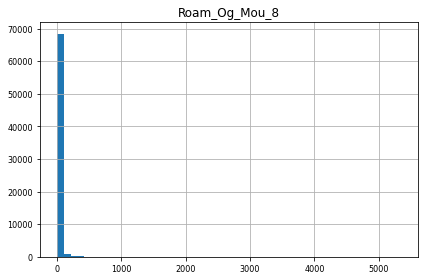

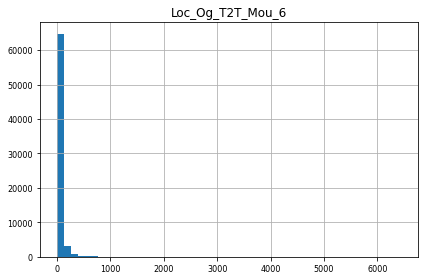

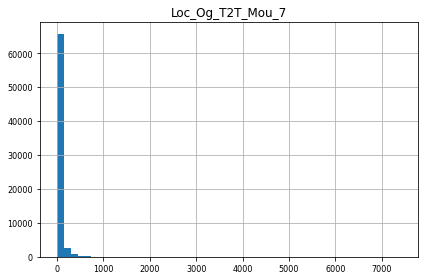

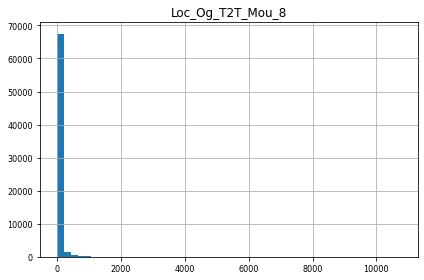

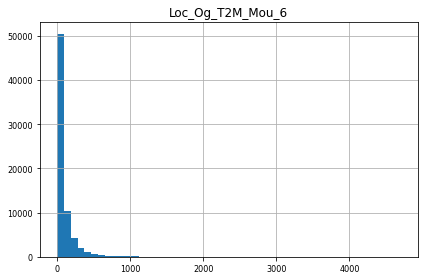

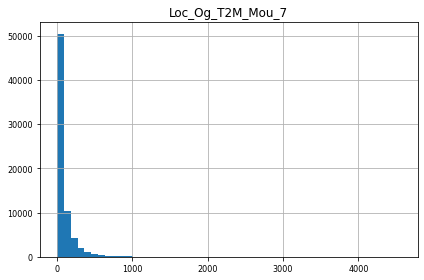

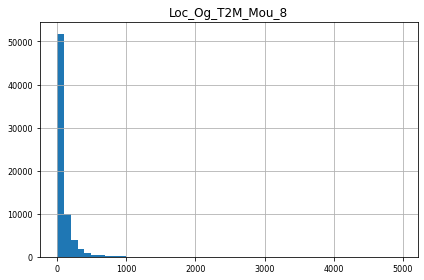

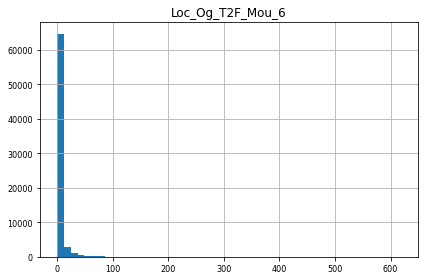

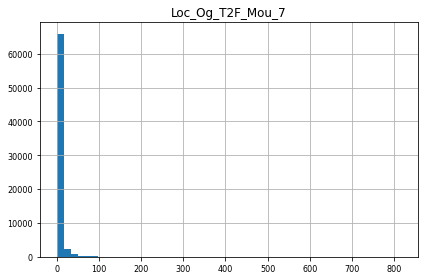

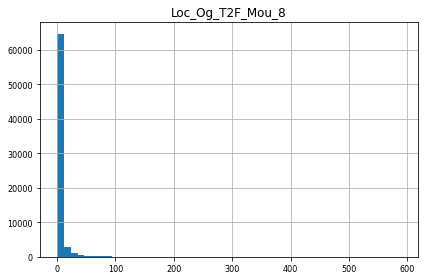

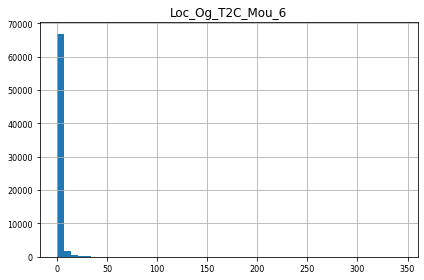

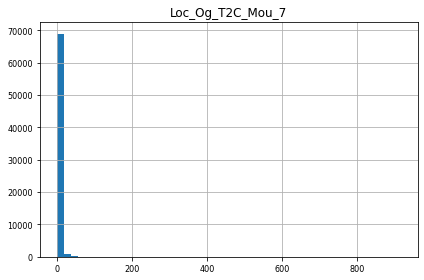

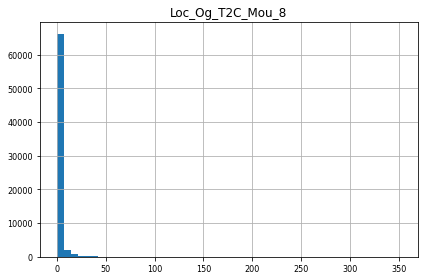

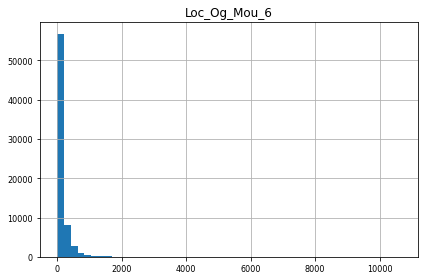

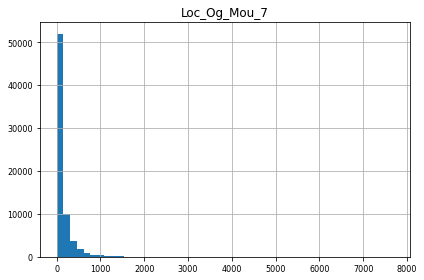

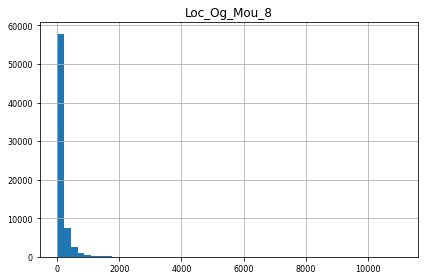

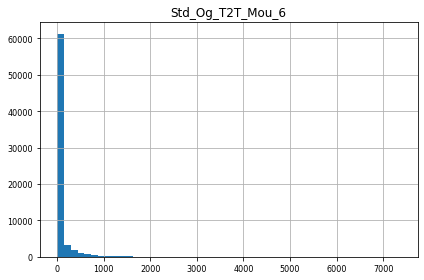

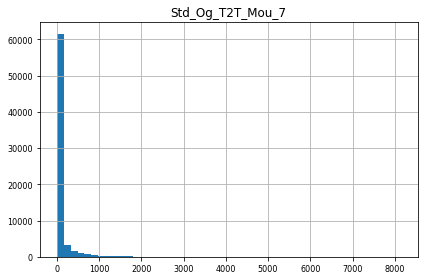

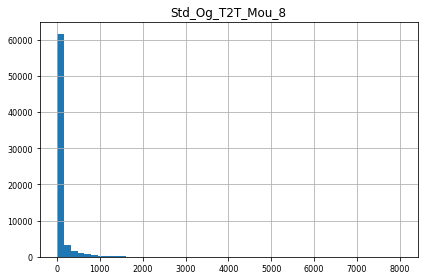

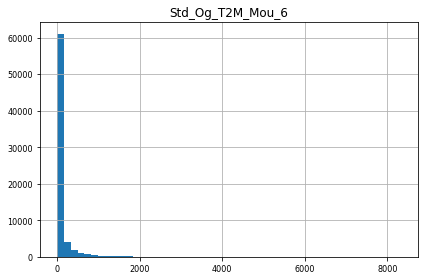

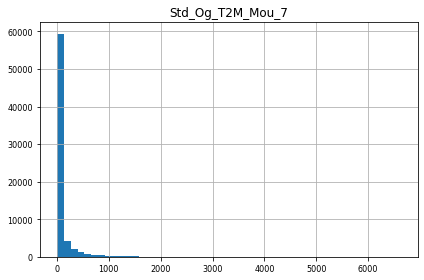

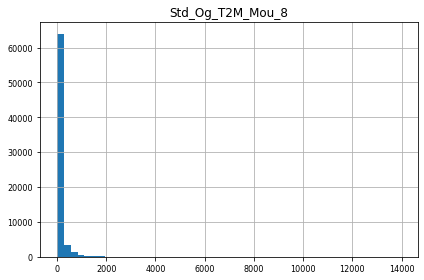

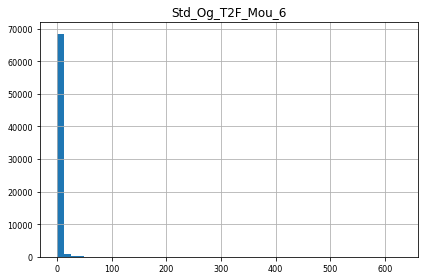

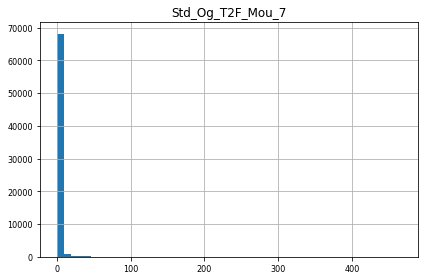

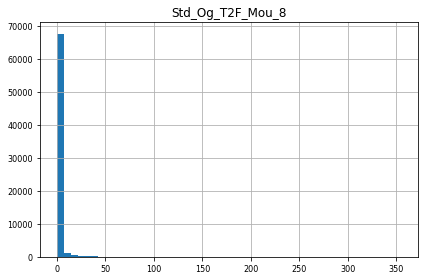

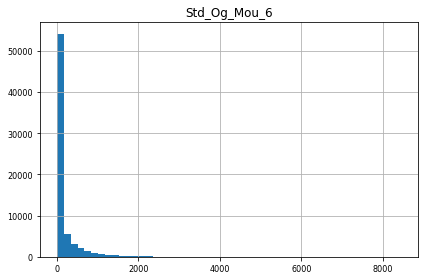

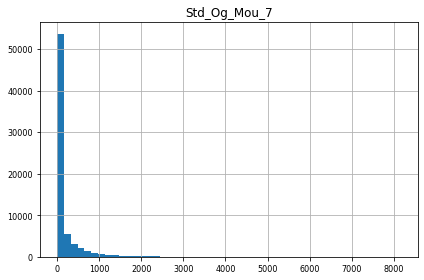

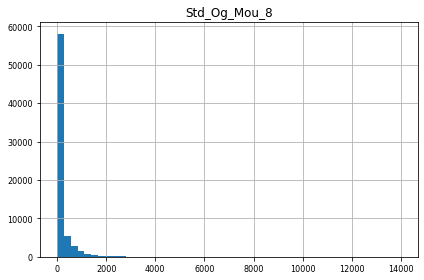

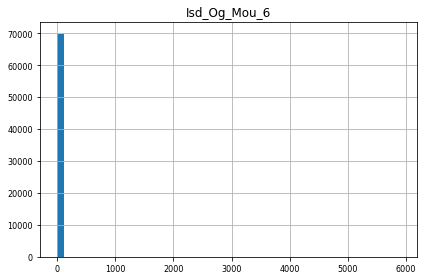

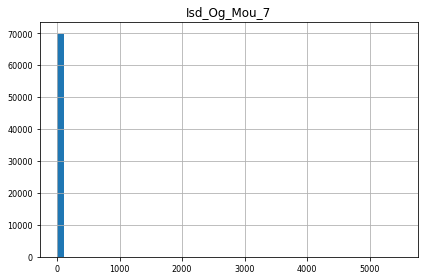

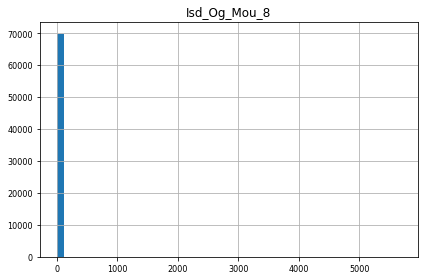

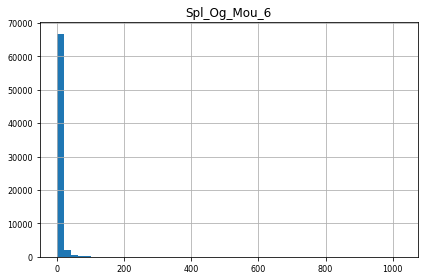

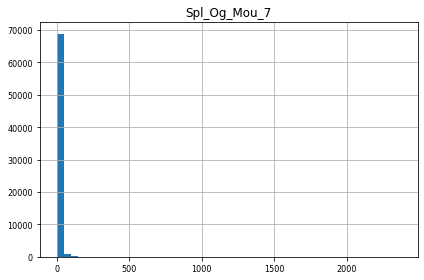

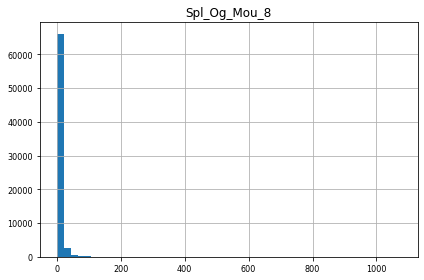

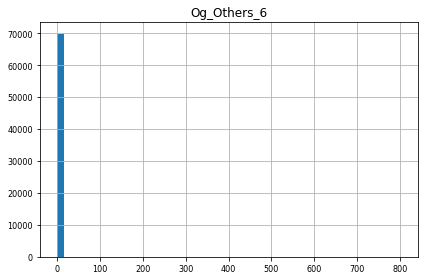

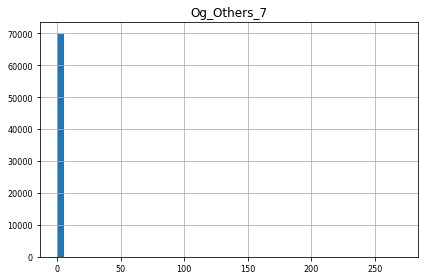

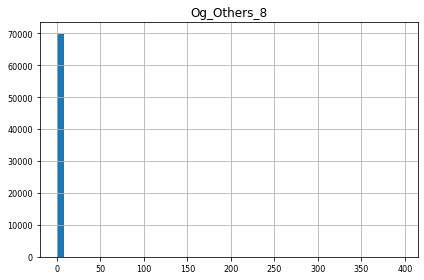

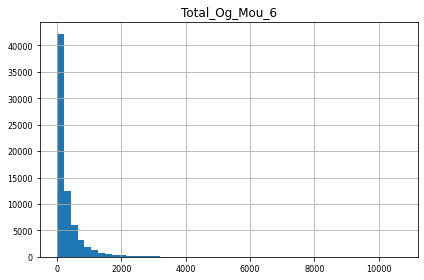

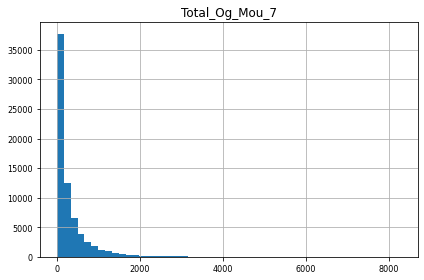

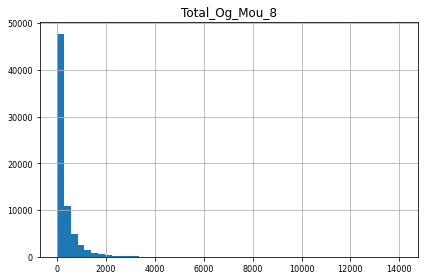

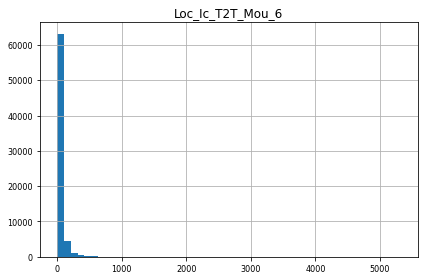

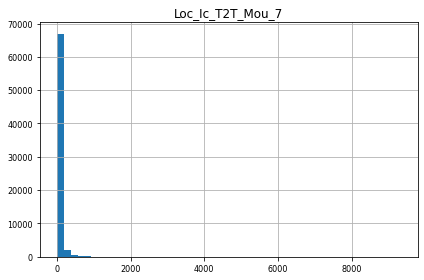

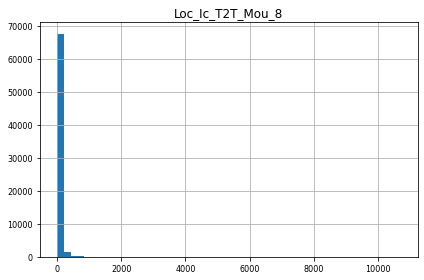

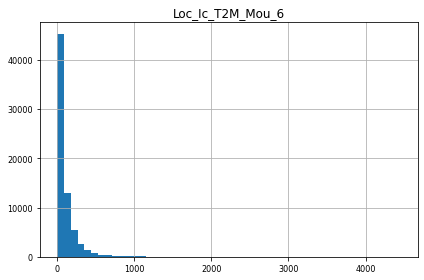

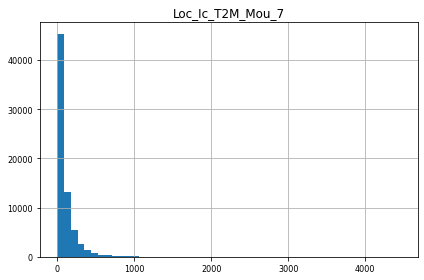

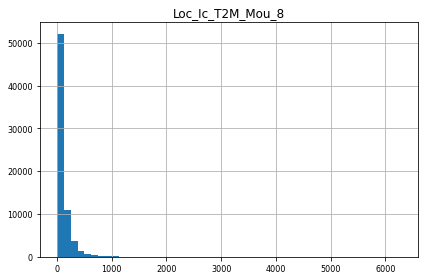

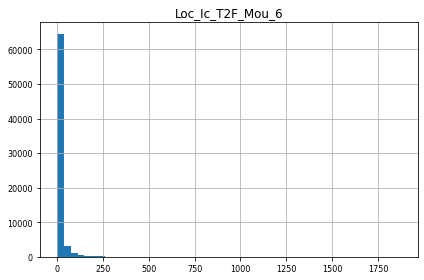

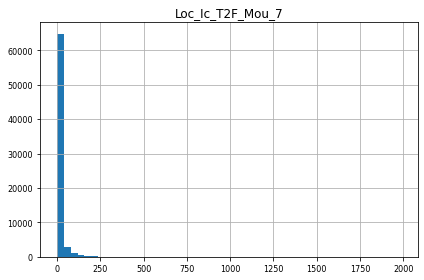

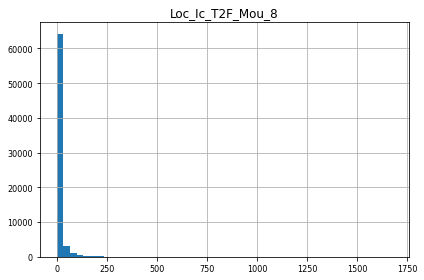

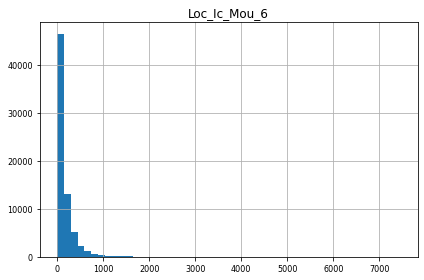

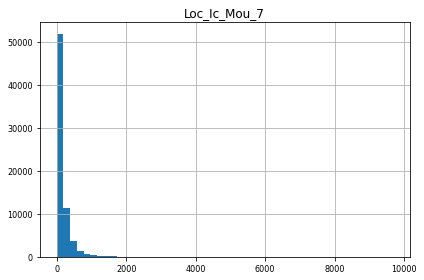

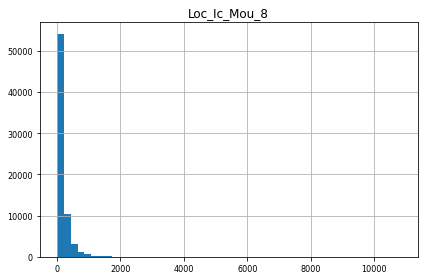

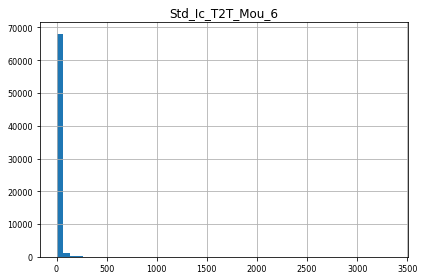

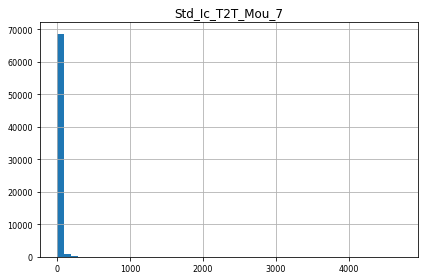

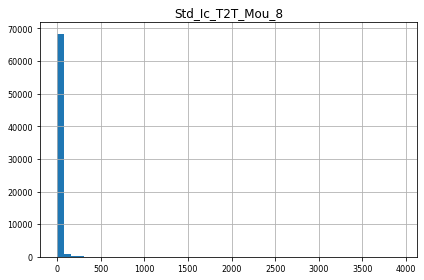

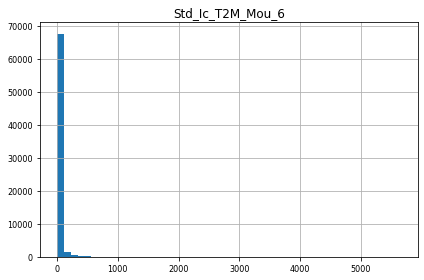

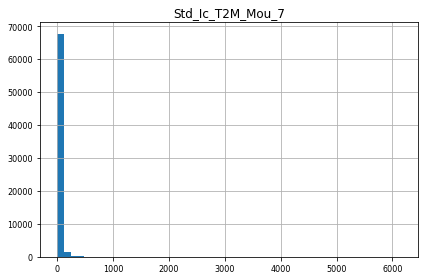

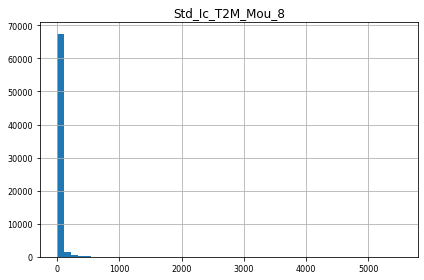

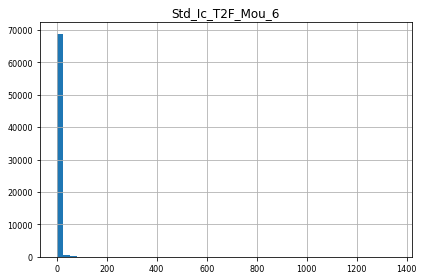

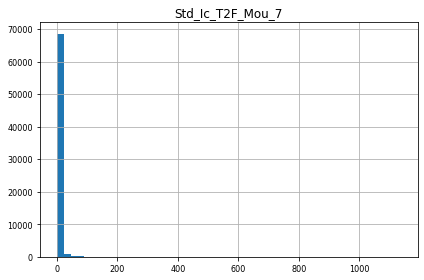

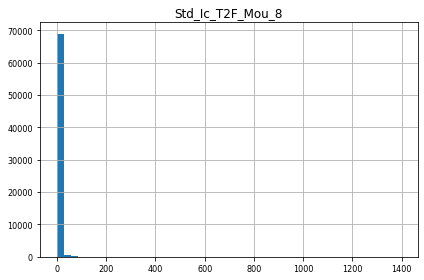

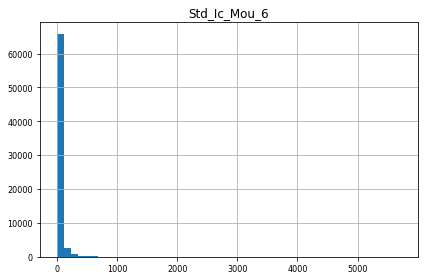

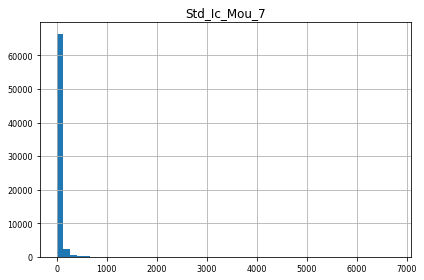

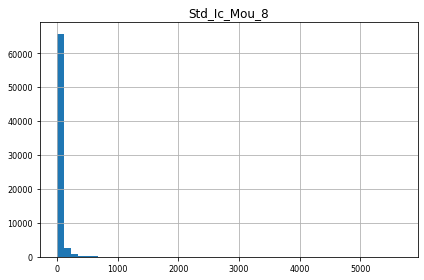

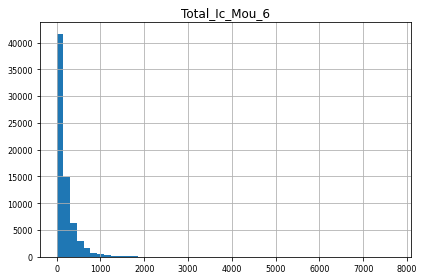

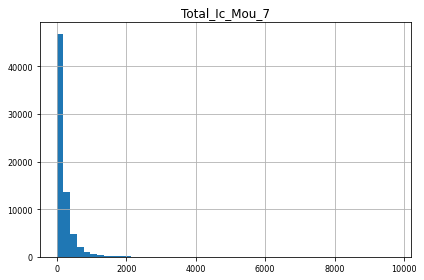

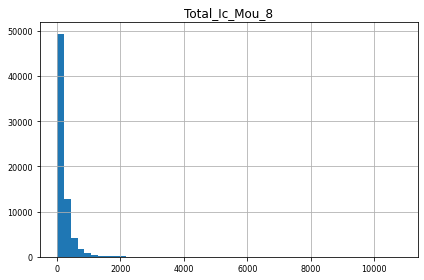

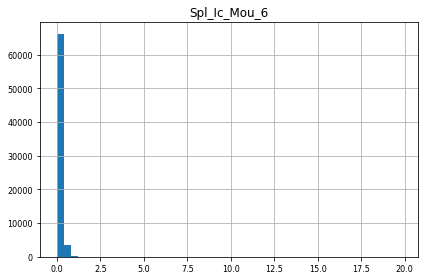

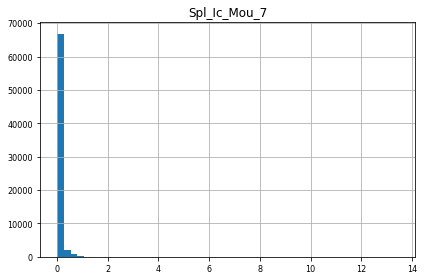

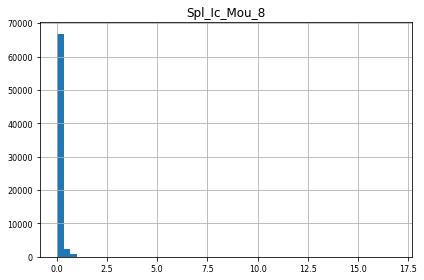

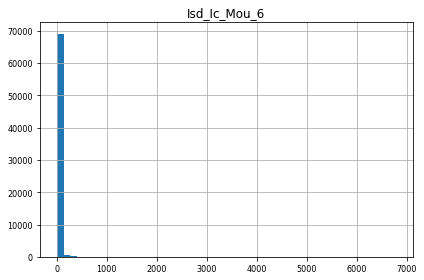

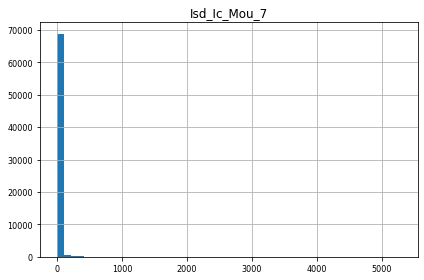

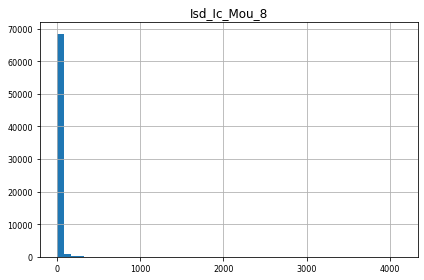

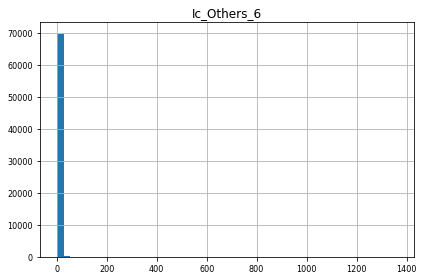

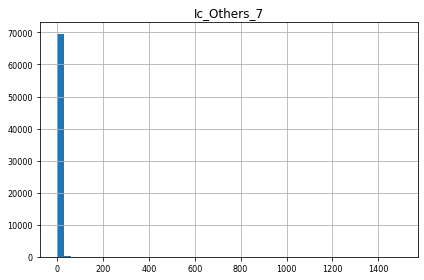

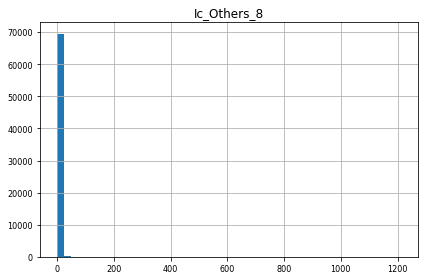

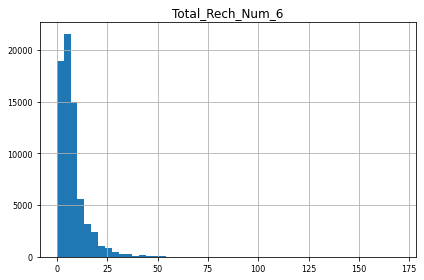

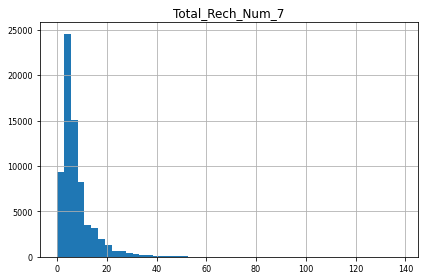

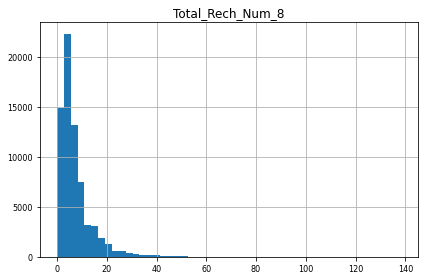

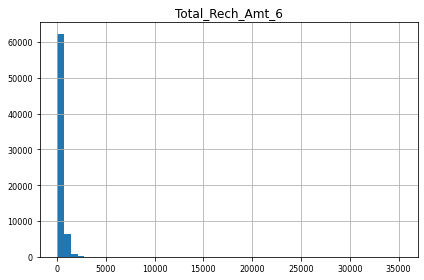

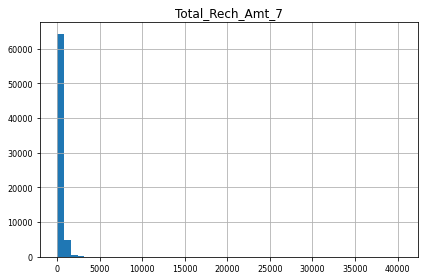

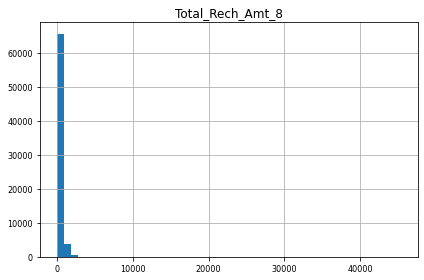

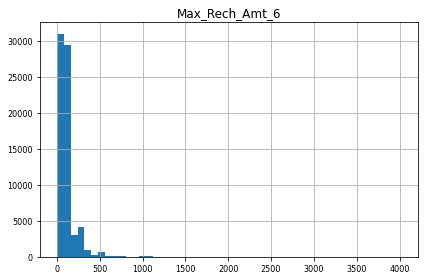

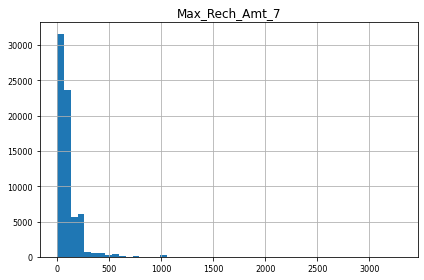

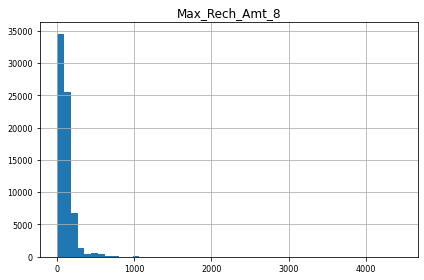

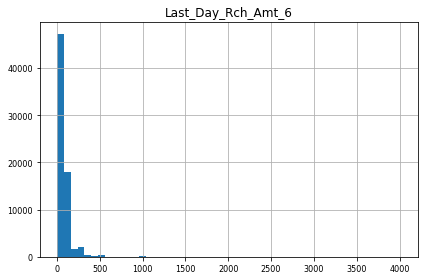

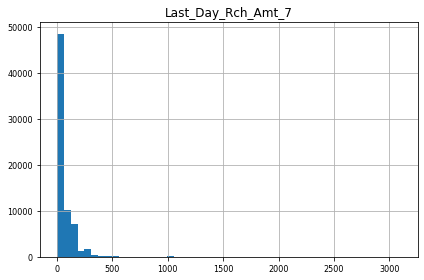

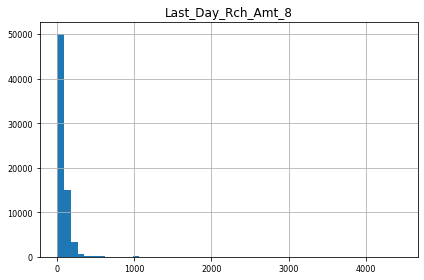

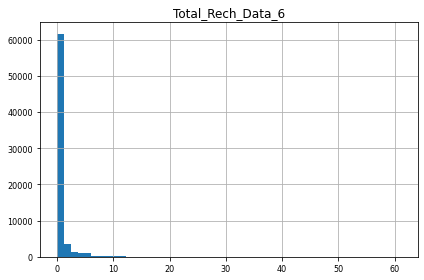

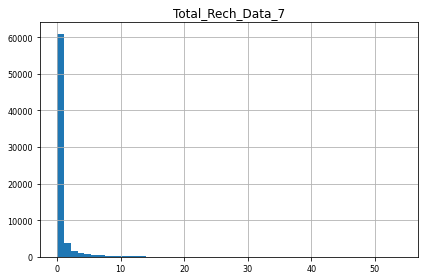

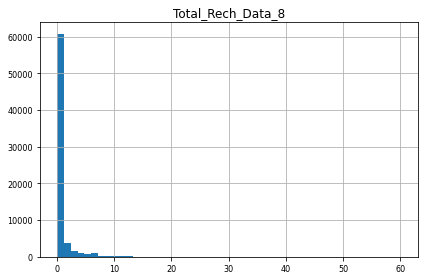

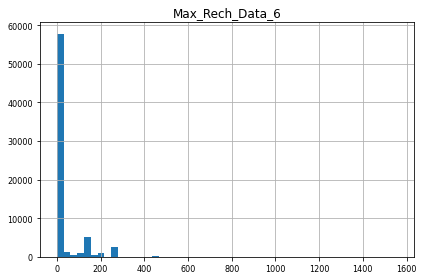

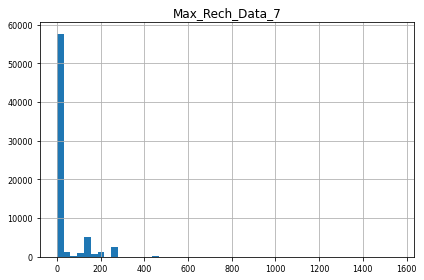

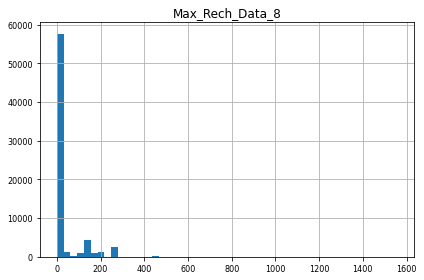

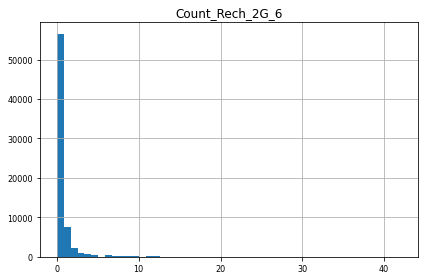

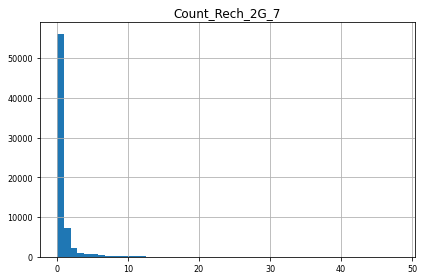

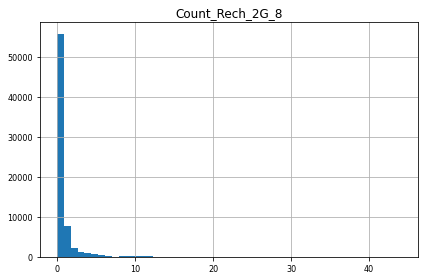

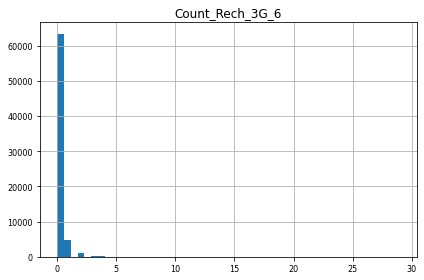

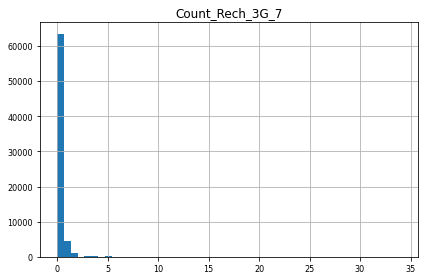

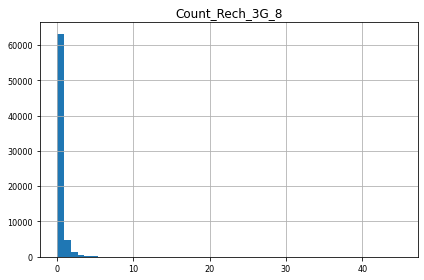

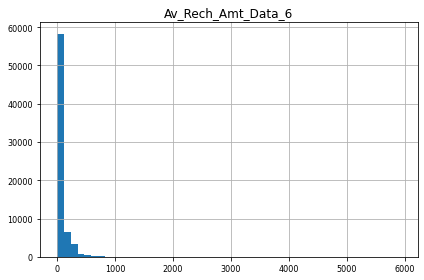

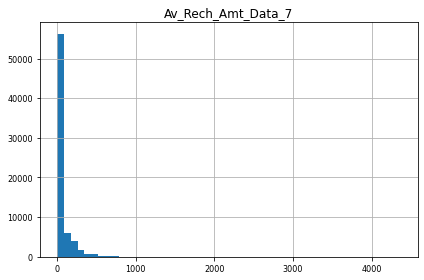

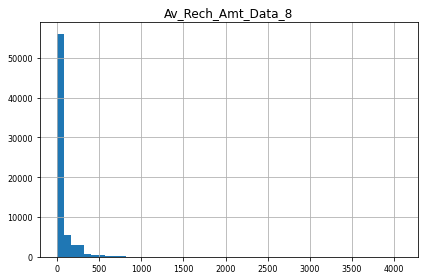

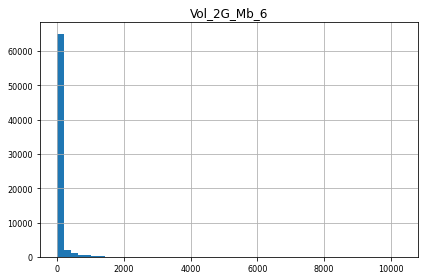

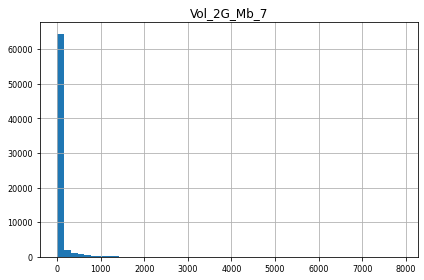

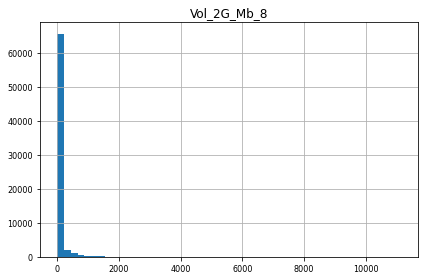

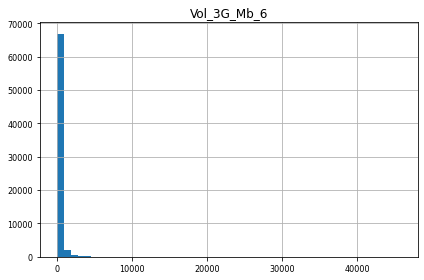

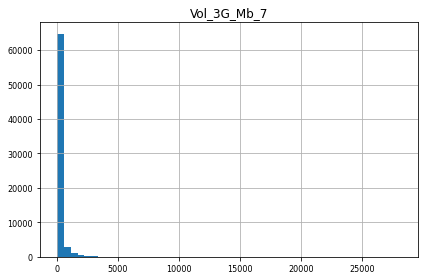

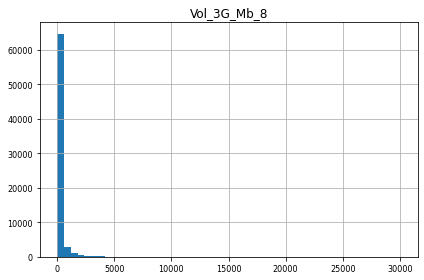

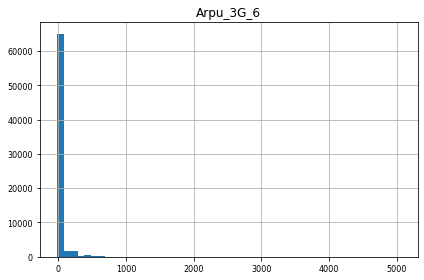

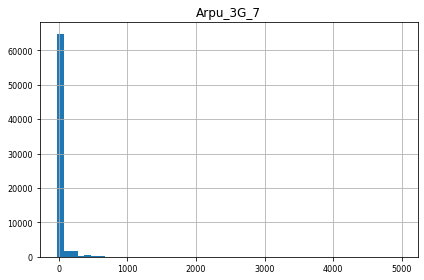

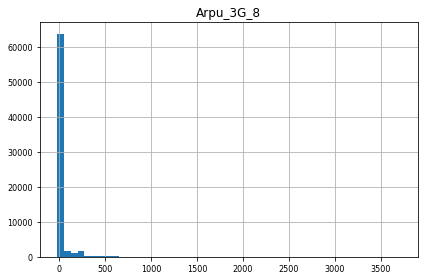

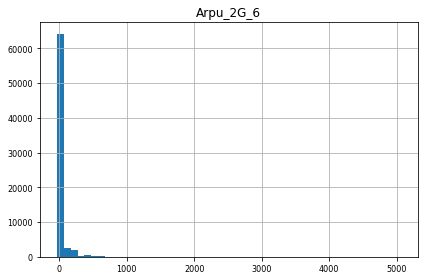

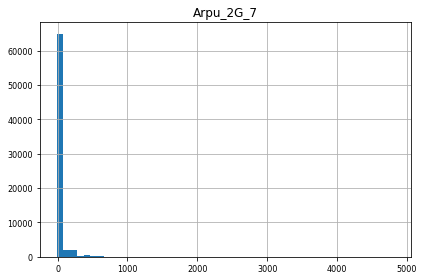

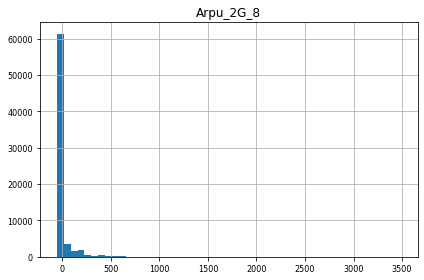

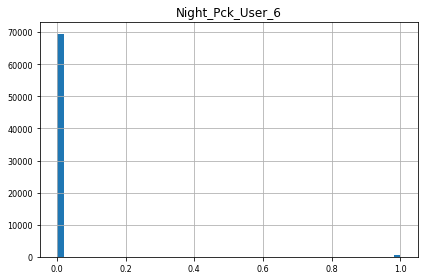

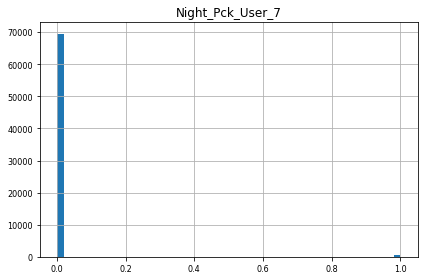

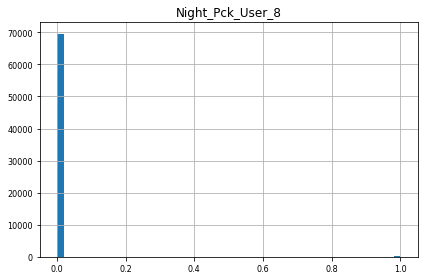

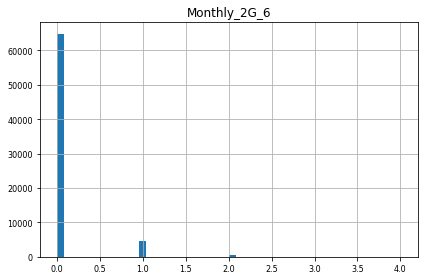

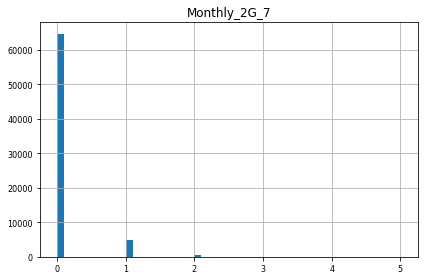

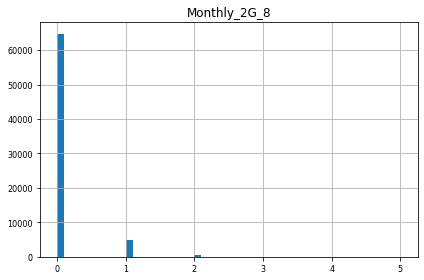

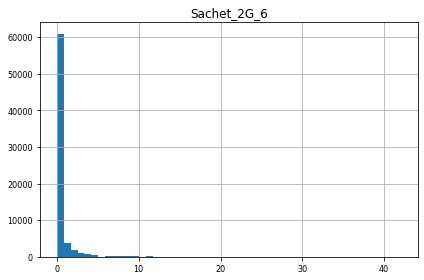

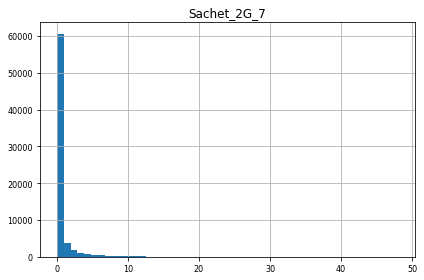

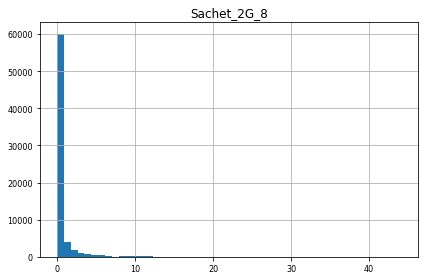

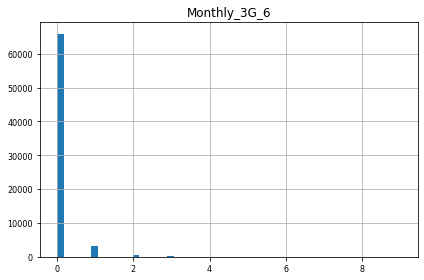

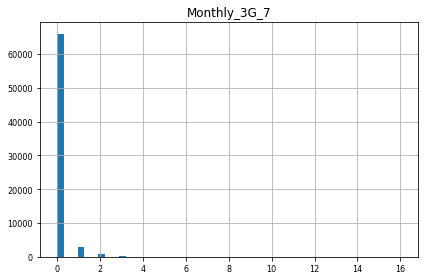

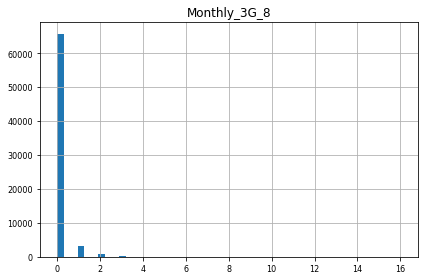

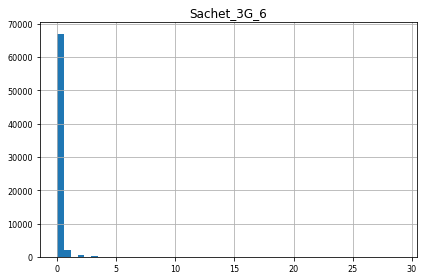

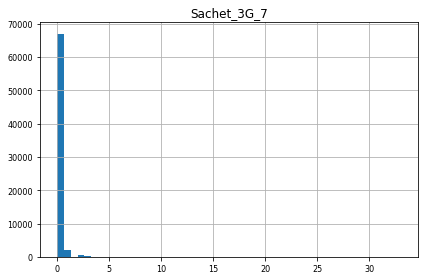

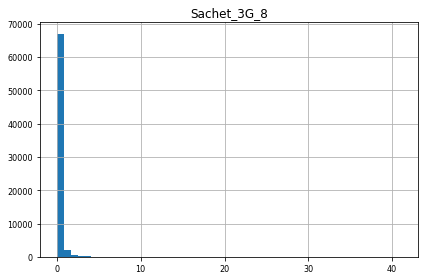

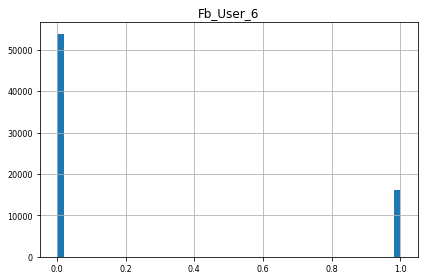

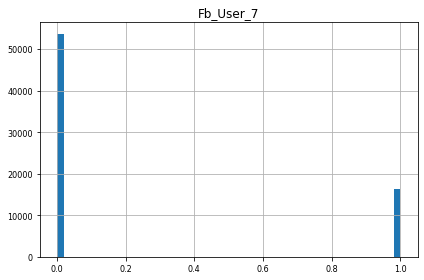

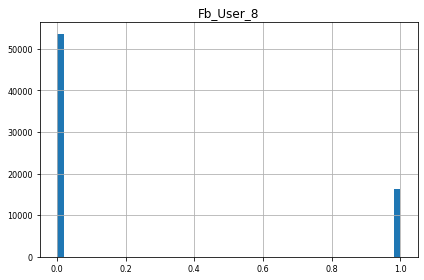

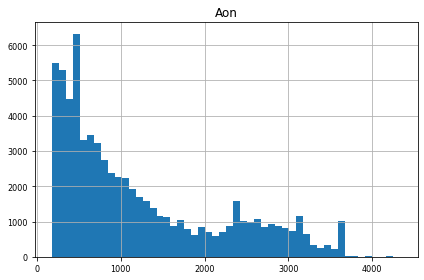

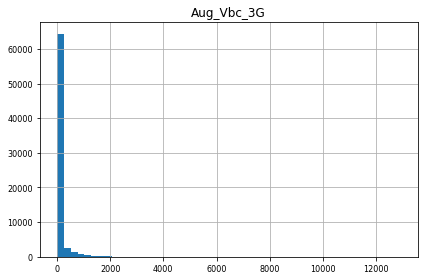

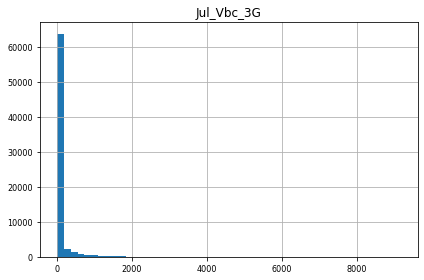

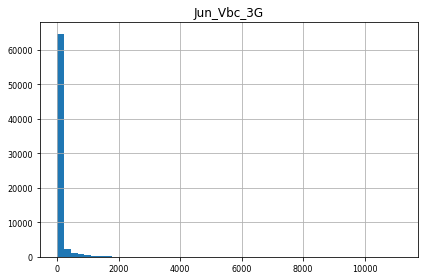

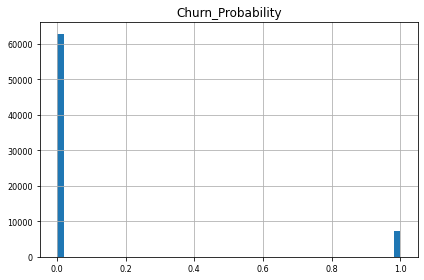

In [22]:
#Checking hist diagran of all number columns
def plotHistChart(i):
    plt.subplot(1,1,1)
    ax = data_train[i].hist(bins=50, xlabelsize=8, ylabelsize=8)
    ax.set_title(i.title())
    plt.tight_layout()
    plt.show()
    
for i in data_train.select_dtypes(include=['number']):
    plotHistChart(i)



In [23]:
data_train.describe()

,id,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
count,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69

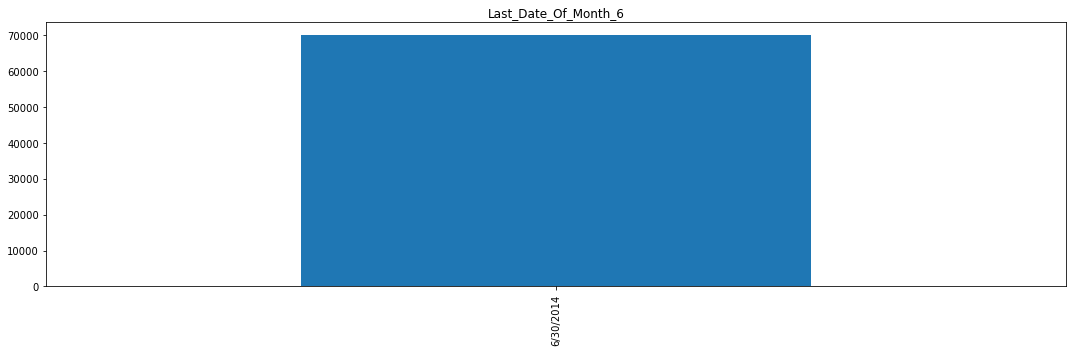

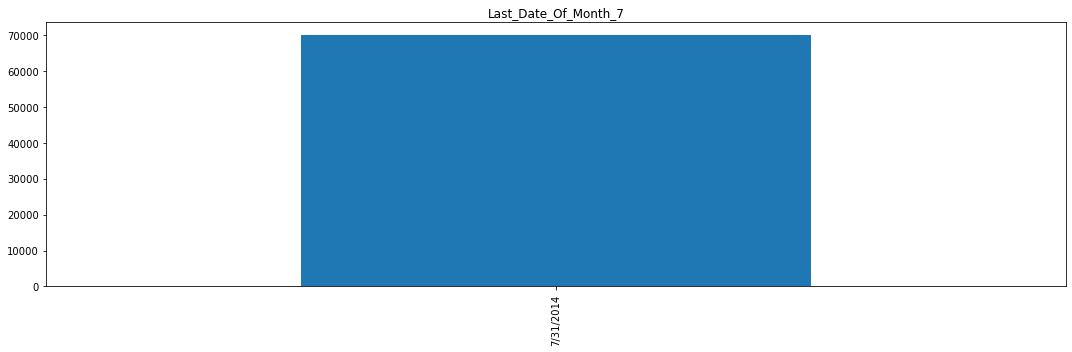

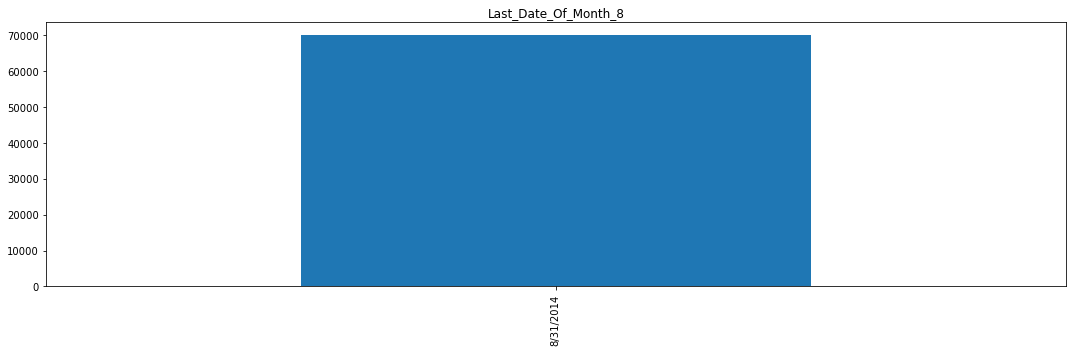

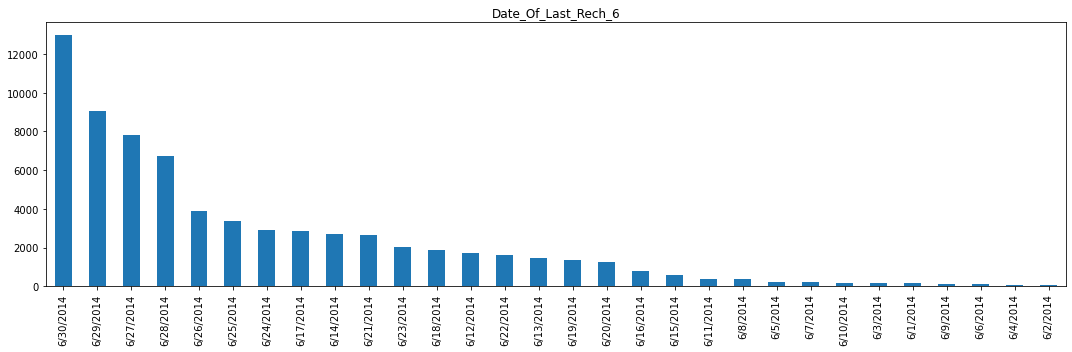

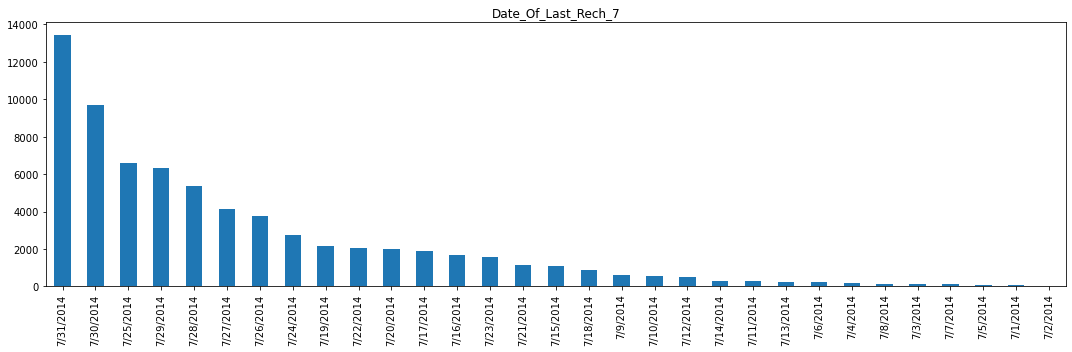

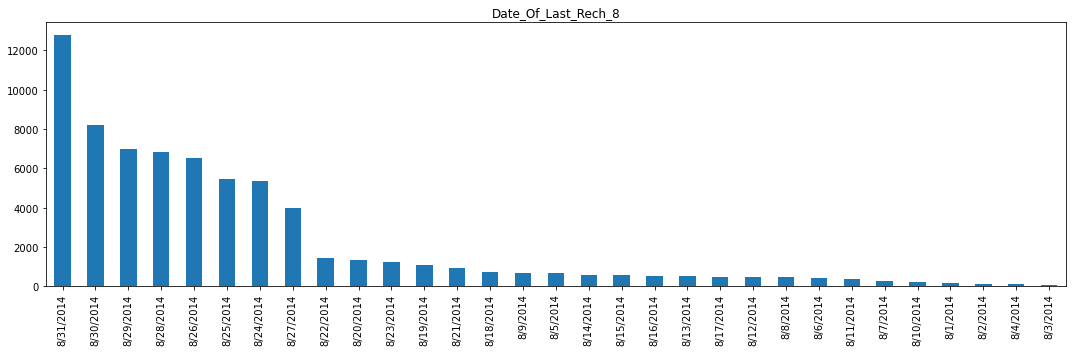

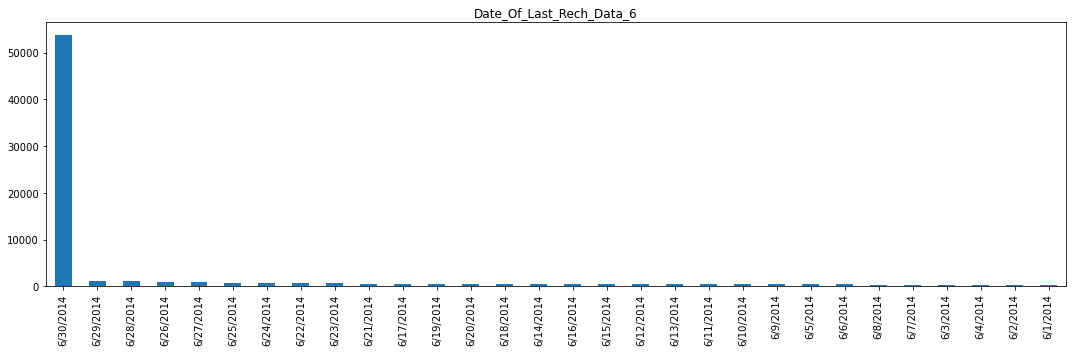

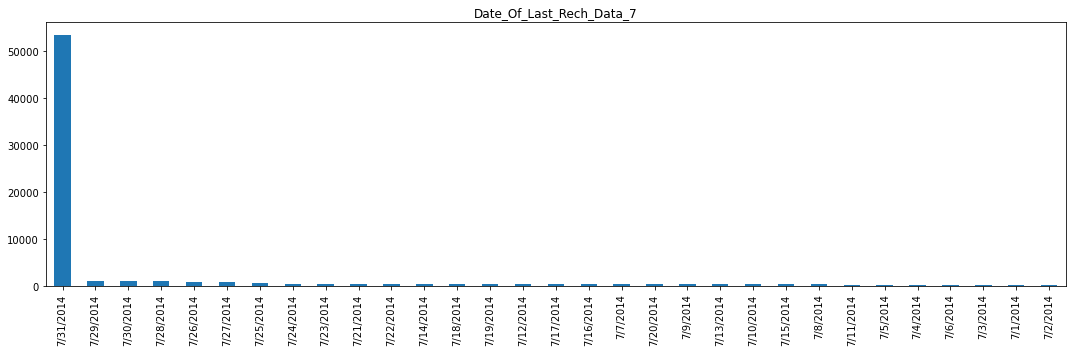

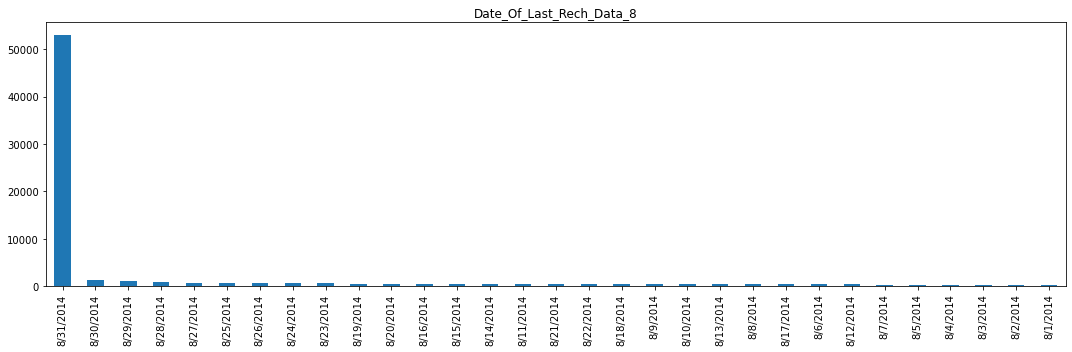

In [24]:
#Checking all Object columns bar graphs
def plotBarChart(i):
    plt.figure(figsize=(15, 5))
    plt.subplot(1,1,1)
    ax = data_train[i].value_counts().plot.bar()
    ax.set_title(i.title())
    plt.tight_layout()
    plt.show()

for i in data_train.select_dtypes(include=['object']):
    plotBarChart(i)

In [25]:
data_train.filter(regex='ic').filter(regex='_6').head()

,roam_ic_mou_6,loc_ic_t2t_mou_6,loc_ic_t2m_mou_6,loc_ic_t2f_mou_6,loc_ic_mou_6,std_ic_t2t_mou_6,std_ic_t2m_mou_6,std_ic_t2f_mou_6,std_ic_mou_6,total_ic_mou_6,spl_ic_mou_6,isd_ic_mou_6,ic_others_6
0,0.00,2.43,0.83,0.00,3.26,0.00,7.46,0.0,7.46,11.84,0.0,0.0,1.11
1,0.00,1.68,1.41,0.35,3.44,0.00,0.00,0.0,0.00,3.44,0.0,0.0,0.00
2,0.00,4.51,89.86,0.00,94.38,11.69,18.21,0.0,29.91,124.29,0.0,0.0,0.00
3,0.00,24.98,53.99,7.23,86.21,0.00,8.89,0.0,8.89,95.11,0.0,0.0,0.00
4,53.64,5.44,10.58,5.51,21.54,0.00,0.00,0.0,0.00,21.54,0.0,0.0,0.00


In [26]:
data_train.filter(regex='rech').filter(regex='_6').head()

,total_rech_num_6,total_rech_amt_6,max_rech_amt_6,date_of_last_rech_6,date_of_last_rech_data_6,total_rech_data_6,max_rech_data_6,count_rech_2g_6,count_rech_3g_6,av_rech_amt_data_6
0,3,77,65,6/22/2014,6/30/2014,0.0,0.0,0.0,0.0,0.0
1,3,0,0,6/12/2014,6/30/2014,0.0,0.0,0.0,0.0,0.0
2,2,70,70,6/11/2014,6/30/2014,0.0,0.0,0.0,0.0,0.0
3,2,160,110,6/15/2014,6/30/2014,0.0,0.0,0.0,0.0,0.0
4,13,290,50,6/25/2014,6/25/2014,7.0,25.0,7.0,0.0,175.0


In [27]:
#Calculate total recharge 
data_train['total_data_rech_amt_6'] = data_train['total_rech_data_6'] * data_train['av_rech_amt_data_6']
data_train['total_data_rech_amt_7'] = data_train['total_rech_data_7'] * data_train['av_rech_amt_data_7']
data_train['total_data_rech_amt_8'] = data_train['total_rech_data_8'] * data_train['av_rech_amt_data_8']
data_train['total_rech_6'] = data_train[['total_data_rech_amt_6','total_rech_amt_6']].sum(axis=1)
data_train['total_rech_7'] = data_train[['total_data_rech_amt_7','total_rech_amt_7']].sum(axis=1)
data_train['total_rech_8'] = data_train[['total_data_rech_amt_8','total_rech_amt_8']].sum(axis=1)

drop_data_rech_columns = ['total_rech_data_6','av_rech_amt_data_6',
                         'total_rech_data_7','av_rech_amt_data_7',
                         'total_rech_data_8','av_rech_amt_data_8',
                         'total_rech_num_6', 'total_rech_num_7', 'total_rech_num_8',
                         'max_rech_amt_6', 'max_rech_amt_7', 'max_rech_amt_8', 
                         'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8']
data_train.drop(drop_data_rech_columns,axis=1,inplace=True)

In [28]:
data_test['total_data_rech_amt_6'] = data_test['total_rech_data_6'] * data_test['av_rech_amt_data_6']
data_test['total_data_rech_amt_7'] = data_test['total_rech_data_7'] * data_test['av_rech_amt_data_7']
data_test['total_data_rech_amt_8'] = data_test['total_rech_data_8'] * data_test['av_rech_amt_data_8']
data_test['total_rech_6'] = data_test[['total_data_rech_amt_6','total_rech_amt_6']].sum(axis=1)
data_test['total_rech_7'] = data_test[['total_data_rech_amt_7','total_rech_amt_7']].sum(axis=1)
data_test['total_rech_8'] = data_test[['total_data_rech_amt_8','total_rech_amt_8']].sum(axis=1)

data_test.drop(drop_data_rech_columns,axis=1,inplace=True)

In [29]:
#Calculate Roaming
data_train['roam_6'] = data_train[['roam_ic_mou_6', 'roam_og_mou_6']].sum(axis = 1).apply(lambda x: 1 if (x>0) else 0)
data_train['roam_7'] = data_train[['roam_ic_mou_7', 'roam_og_mou_7']].sum(axis = 1).apply(lambda x: 1 if (x>0) else 0)
data_train['roam_8'] = data_train[['roam_ic_mou_8', 'roam_og_mou_8']].sum(axis = 1).apply(lambda x: 1 if (x>0) else 0)

drop_roam_columns =['roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 
                    'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8']
data_train.drop(drop_roam_columns,axis=1,inplace=True)

In [30]:
data_test['roam_6'] = data_test[['roam_ic_mou_6', 'roam_og_mou_6']].sum(axis = 1).apply(lambda x: 1 if (x>0) else 0)
data_test['roam_7'] = data_test[['roam_ic_mou_7', 'roam_og_mou_7']].sum(axis = 1).apply(lambda x: 1 if (x>0) else 0)
data_test['roam_8'] = data_test[['roam_ic_mou_8', 'roam_og_mou_8']].sum(axis = 1).apply(lambda x: 1 if (x>0) else 0)

data_test.drop(drop_roam_columns,axis=1,inplace=True)

In [31]:
#Calculate Local
data_train['local_6'] = data_train[['loc_og_t2t_mou_6', 'loc_og_t2m_mou_6', 'loc_og_t2f_mou_6', 'loc_og_t2c_mou_6', 'loc_og_mou_6', 'loc_ic_t2t_mou_6', 'loc_ic_t2m_mou_6', 'loc_ic_t2f_mou_6', 'loc_ic_mou_6']].sum(axis=1).apply(lambda x: 1 if (x > 0) else 0)
data_train['local_7'] = data_train[['loc_og_t2t_mou_7', 'loc_og_t2m_mou_7', 'loc_og_t2f_mou_7', 'loc_og_t2c_mou_7', 'loc_og_mou_7', 'loc_ic_t2t_mou_7', 'loc_ic_t2m_mou_7', 'loc_ic_t2f_mou_7', 'loc_ic_mou_7']].sum(axis=1).apply(lambda x: 1 if (x > 0) else 0)
data_train['local_8'] = data_train[['loc_og_t2t_mou_8', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_8', 'loc_og_t2c_mou_8', 'loc_og_mou_8', 'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_8', 'loc_ic_t2f_mou_8', 'loc_ic_mou_8']].sum(axis=1).apply(lambda x: 1 if (x > 0) else 0)

drop_loc_columns = ['loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8', 
                    'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 
                    'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8', 
                    'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8', 
                    'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 
                    'loc_ic_t2t_mou_6', 'loc_ic_t2t_mou_7', 'loc_ic_t2t_mou_8', 
                    'loc_ic_t2m_mou_6', 'loc_ic_t2m_mou_7', 'loc_ic_t2m_mou_8', 
                    'loc_ic_t2f_mou_6', 'loc_ic_t2f_mou_7', 'loc_ic_t2f_mou_8', 
                    'loc_ic_mou_6', 'loc_ic_mou_7', 'loc_ic_mou_8']
data_train.drop(drop_loc_columns,axis=1,inplace=True)

In [32]:
data_test['local_6'] = data_test[['loc_og_t2t_mou_6', 'loc_og_t2m_mou_6', 'loc_og_t2f_mou_6', 'loc_og_t2c_mou_6', 'loc_og_mou_6', 'loc_ic_t2t_mou_6', 'loc_ic_t2m_mou_6', 'loc_ic_t2f_mou_6', 'loc_ic_mou_6']].sum(axis=1).apply(lambda x: 1 if (x > 0) else 0)
data_test['local_7'] = data_test[['loc_og_t2t_mou_7', 'loc_og_t2m_mou_7', 'loc_og_t2f_mou_7', 'loc_og_t2c_mou_7', 'loc_og_mou_7', 'loc_ic_t2t_mou_7', 'loc_ic_t2m_mou_7', 'loc_ic_t2f_mou_7', 'loc_ic_mou_7']].sum(axis=1).apply(lambda x: 1 if (x > 0) else 0)
data_test['local_8'] = data_test[['loc_og_t2t_mou_8', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_8', 'loc_og_t2c_mou_8', 'loc_og_mou_8', 'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_8', 'loc_ic_t2f_mou_8', 'loc_ic_mou_8']].sum(axis=1).apply(lambda x: 1 if (x > 0) else 0)

data_test.drop(drop_loc_columns,axis=1,inplace=True)

In [33]:
#Calculate STD
data_train['std_6'] = data_train[['std_og_t2t_mou_6', 'std_og_t2m_mou_6', 'std_og_t2f_mou_6', 'std_og_mou_6', 'std_ic_t2t_mou_6', 'std_ic_t2m_mou_6', 'std_ic_t2f_mou_6', 'std_ic_mou_6']].sum(axis=1).apply(lambda x: 1 if (x > 0) else 0)
data_train['std_7'] = data_train[['std_og_t2t_mou_7', 'std_og_t2m_mou_7', 'std_og_t2f_mou_7', 'std_og_mou_7', 'std_ic_t2t_mou_7', 'std_ic_t2m_mou_7', 'std_ic_t2f_mou_7', 'std_ic_mou_7']].sum(axis=1).apply(lambda x: 1 if (x > 0) else 0)
data_train['std_8'] = data_train[['std_og_t2t_mou_8', 'std_og_t2m_mou_8', 'std_og_t2f_mou_8', 'std_og_mou_8', 'std_ic_t2t_mou_8', 'std_ic_t2m_mou_8', 'std_ic_t2f_mou_8', 'std_ic_mou_8']].sum(axis=1).apply(lambda x: 1 if (x > 0) else 0)

drop_std_columns = ['std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 
                    'std_og_t2m_mou_6', 'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 
                    'std_og_t2f_mou_6', 'std_og_t2f_mou_7', 'std_og_t2f_mou_8', 
                    'std_og_mou_6', 'std_og_mou_7', 'std_og_mou_8', 
                    'std_ic_t2t_mou_6', 'std_ic_t2t_mou_7', 'std_ic_t2t_mou_8', 
                    'std_ic_t2m_mou_6', 'std_ic_t2m_mou_7', 'std_ic_t2m_mou_8', 
                    'std_ic_t2f_mou_6', 'std_ic_t2f_mou_7', 'std_ic_t2f_mou_8', 
                    'std_ic_mou_6', 'std_ic_mou_7', 'std_ic_mou_8']
data_train.drop(drop_std_columns,axis=1,inplace=True)

In [34]:
data_test['std_6'] = data_test[['std_og_t2t_mou_6', 'std_og_t2m_mou_6', 'std_og_t2f_mou_6', 'std_og_mou_6', 'std_ic_t2t_mou_6', 'std_ic_t2m_mou_6', 'std_ic_t2f_mou_6', 'std_ic_mou_6']].sum(axis=1).apply(lambda x: 1 if (x > 0) else 0)
data_test['std_7'] = data_test[['std_og_t2t_mou_7', 'std_og_t2m_mou_7', 'std_og_t2f_mou_7', 'std_og_mou_7', 'std_ic_t2t_mou_7', 'std_ic_t2m_mou_7', 'std_ic_t2f_mou_7', 'std_ic_mou_7']].sum(axis=1).apply(lambda x: 1 if (x > 0) else 0)
data_test['std_8'] = data_test[['std_og_t2t_mou_8', 'std_og_t2m_mou_8', 'std_og_t2f_mou_8', 'std_og_mou_8', 'std_ic_t2t_mou_8', 'std_ic_t2m_mou_8', 'std_ic_t2f_mou_8', 'std_ic_mou_8']].sum(axis=1).apply(lambda x: 1 if (x > 0) else 0)

data_test.drop(drop_std_columns,axis=1,inplace=True)

In [35]:
#Calculate SPL
data_train['spl_6'] = data_train[['isd_og_mou_6', 'spl_og_mou_6', 'og_others_6', 'spl_ic_mou_6', 'isd_ic_mou_6', 'ic_others_6']].sum(axis=1).apply(lambda x: 1 if (x > 0) else 0)
data_train['spl_7'] = data_train[['isd_og_mou_7', 'spl_og_mou_7', 'og_others_7', 'spl_ic_mou_7', 'isd_ic_mou_7', 'ic_others_7']].sum(axis=1).apply(lambda x: 1 if (x > 0) else 0)
data_train['spl_8'] = data_train[['isd_og_mou_8', 'spl_og_mou_8', 'og_others_8', 'spl_ic_mou_8', 'isd_ic_mou_8', 'ic_others_8']].sum(axis=1).apply(lambda x: 1 if (x > 0) else 0)

drop_spl_columns = ['isd_og_mou_6', 'isd_og_mou_7', 'isd_og_mou_8', 
                    'spl_og_mou_6', 'spl_og_mou_7', 'spl_og_mou_8', 
                    'og_others_6', 'og_others_7', 'og_others_8',  
                    'spl_ic_mou_6', 'spl_ic_mou_7', 'spl_ic_mou_8', 
                    'isd_ic_mou_6', 'isd_ic_mou_7', 'isd_ic_mou_8', 
                    'ic_others_6', 'ic_others_7', 'ic_others_8']
data_train.drop(drop_spl_columns,axis=1,inplace=True)

In [36]:
data_test['spl_6'] = data_test[['isd_og_mou_6', 'spl_og_mou_6', 'og_others_6', 'spl_ic_mou_6', 'isd_ic_mou_6', 'ic_others_6']].sum(axis=1).apply(lambda x: 1 if (x > 0) else 0)
data_test['spl_7'] = data_test[['isd_og_mou_7', 'spl_og_mou_7', 'og_others_7', 'spl_ic_mou_7', 'isd_ic_mou_7', 'ic_others_7']].sum(axis=1).apply(lambda x: 1 if (x > 0) else 0)
data_test['spl_8'] = data_test[['isd_og_mou_8', 'spl_og_mou_8', 'og_others_8', 'spl_ic_mou_8', 'isd_ic_mou_8', 'ic_others_8']].sum(axis=1).apply(lambda x: 1 if (x > 0) else 0)

data_test.drop(drop_spl_columns,axis=1,inplace=True)

In [37]:
#Calculate Data usage
data_train['data_used_6'] = data_train[['vol_2g_mb_6', 'vol_3g_mb_6', 'jun_vbc_3g']].sum(axis=1)
data_train['data_used_7'] = data_train[['vol_2g_mb_7', 'vol_3g_mb_7', 'jul_vbc_3g']].sum(axis=1)
data_train['data_used_8'] = data_train[['vol_2g_mb_8', 'vol_3g_mb_8', 'aug_vbc_3g']].sum(axis=1)
drop_data_usage_columns = ['vol_2g_mb_6', 'vol_2g_mb_7', 'vol_2g_mb_8', 
                           'vol_3g_mb_6', 'vol_3g_mb_7', 'vol_3g_mb_8', 
                           'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g']
data_train.drop(drop_data_usage_columns,axis=1,inplace=True)

In [38]:
data_test['data_used_6'] = data_test[['vol_2g_mb_6', 'vol_3g_mb_6', 'jun_vbc_3g']].sum(axis=1)
data_test['data_used_7'] = data_test[['vol_2g_mb_7', 'vol_3g_mb_7', 'jul_vbc_3g']].sum(axis=1)
data_test['data_used_8'] = data_test[['vol_2g_mb_8', 'vol_3g_mb_8', 'aug_vbc_3g']].sum(axis=1)

data_test.drop(drop_data_usage_columns,axis=1,inplace=True)

In [39]:
drop_others_columns=['count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8', 
                    'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8',
                    'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 
                    'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8',
                    'offnet_mou_6','offnet_mou_7','offnet_mou_8',
                    'fb_user_6','fb_user_7','fb_user_8',
                    'date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8',
                    'date_of_last_rech_data_6', 'date_of_last_rech_data_7', 'date_of_last_rech_data_8']
data_train.drop(drop_others_columns,axis=1,inplace=True)

data_test.drop(drop_others_columns,axis=1,inplace=True)

In [40]:
data_train.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Data columns (total 60 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     69999 non-null  int64  
 1   arpu_6                 69999 non-null  float64
 2   arpu_7                 69999 non-null  float64
 3   arpu_8                 69999 non-null  float64
 4   total_og_mou_6         69999 non-null  float64
 5   total_og_mou_7         69999 non-null  float64
 6   total_og_mou_8         69999 non-null  float64
 7   total_ic_mou_6         69999 non-null  float64
 8   total_ic_mou_7         69999 non-null  float64
 9   total_ic_mou_8         69999 non-null  float64
 10  total_rech_amt_6       69999 non-null  int64  
 11  total_rech_amt_7       69999 non-null  int64  
 12  total_rech_amt_8       69999 non-null  int64  
 13  last_day_rch_amt_6     69999 non-null  int64  
 14  last_day_rch_amt_7     69999 non-null  int64  
 15  la

In [41]:
data_train.head()

,id,arpu_6,arpu_7,arpu_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,churn_probability,total_data_rech_amt_6,total_data_rech_amt_7,total_data_rech_amt_8,total_rech_6,total_rech_7,total_rech_8,roam_6,roam_7,roam_8,local_6,local_7,local_8,std_6,std_7,std_8,spl_6,spl_7,spl_8,data_used_6,data_used_7,data_used_8
0,0,31.277,87.009,7.527,81.21,221.68,3.63,11.84,53.04,40.56,77,65,10,65,65,0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,1958,0,0.0,0.0,0.0,77.0,65.0,10.0,0,0,0,1,1,1,1,1,1,1,1,1,0.0,0.00,0.00
1,1,0.000,122.787,42.953,0.00,30.73,31.66,3.44,39.44,25.04,0,145,50,0,0,0,0.0,122.07,0.0,0.0,122.08,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,1,0,0,0,0,710,0,0.0,145.0,0.0,0.0,290.0,50.0,0,0,0,1,1,1,0,0,0,0,1,1,0.0,356.87,0.00
2,2,60.806,103.176,0.000,56.49,99.36,0.00,124.29,33.83,36.64,70,120,0,70,50,0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,882,0,0.0,0.0,0.0,70.0,120.0,0.0,0,0,0,1,1,1,1,1,1,1,1,1,0.0,0.00,0.00
3,3,156.362,205.260,111.095,76.03,95.98,53.84,95.11,50.18,83.84,160,240,130,110,110,50,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,982,0,0.0,0.0,0.0,160.0,240.0,130.0,0,0,1,1,1,1,1,1,1,1,1,1,0.0,0.00,0.00
4,4,240.708,128.191,101.565,63.26,42.94,15.76,21.54,9.36,28.31,290,136,122,25,10,30,0.0,35.00,0.0,0.0,35.12,0.0,0.0,0.0,0.0,0,0,0,7,6,6,0,0,0,0,1,0,647,0,1225.0,1337.0,852.0,1515.0,1473.0,974.0,1,0,0,1,1,1,1,0,0,0,1,0,390.8,308.89,213.47


In [42]:
#Bivariate Analysis

def plotBoxChart(xAxis,yAxis):
    plt.figure(figsize=(15, 5))
    ax = sns.boxplot(y=yAxis, x=xAxis, data =data_train)
    ax.set_title(xAxis.title() + ' V/S ' + yAxis.title())
    ax.set_xticklabels(ax.get_xticklabels(),rotation=90)    
    plt.tight_layout()
    plt.show()

number_columns = ['arpu_6', 'arpu_7', 'arpu_8', 'total_og_mou_6', 'total_og_mou_7',
       'total_og_mou_8', 'total_ic_mou_6', 'total_ic_mou_7', 'total_ic_mou_8',
       'total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8',
       'last_day_rch_amt_6', 'last_day_rch_amt_7', 'last_day_rch_amt_8',
       'arpu_3g_6', 'arpu_3g_7', 'arpu_3g_8', 'arpu_2g_6', 'arpu_2g_7',
       'arpu_2g_8', 'night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8',
       'monthly_2g_6', 'monthly_2g_7', 'monthly_2g_8', 'sachet_2g_6',
       'sachet_2g_7', 'sachet_2g_8', 'monthly_3g_6', 'monthly_3g_7',
       'monthly_3g_8', 'sachet_3g_6', 'sachet_3g_7', 'sachet_3g_8', 'aon',
       'total_data_rech_amt_6', 'total_data_rech_amt_7',
       'total_data_rech_amt_8', 'total_rech_6', 'total_rech_7', 'total_rech_8',
       'roam_6', 'roam_7', 'roam_8', 'local_6', 'local_7', 'local_8', 'std_6',
       'std_7', 'std_8', 'spl_6', 'spl_7', 'spl_8', 'data_used_6',
       'data_used_7', 'data_used_8']

#for i in number_columns:
#    plotBoxChart(i,'churn_probability') 


In [44]:
X_train = data_train.drop(['churn_probability'], axis=1)
y_train = data_train['churn_probability']

X_test = data_test

In [45]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)

(69999, 59)
(69999,)
(30000, 59)


In [46]:
#Scaling 
scaler = StandardScaler()
X_train[X_train.columns] = scaler.fit_transform(X_train[X_train.columns])

In [47]:
X_train.head()

,id,arpu_6,arpu_7,arpu_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,total_data_rech_amt_6,total_data_rech_amt_7,total_data_rech_amt_8,total_rech_6,total_rech_7,total_rech_8,roam_6,roam_7,roam_8,local_6,local_7,local_8,std_6,std_7,std_8,spl_6,spl_7,spl_8,data_used_6,data_used_7,data_used_8
0,-1.732026,-0.753587,-0.555159,-0.771000,-0.483870,-0.185530,-0.629550,-0.647578,-0.501528,-0.547718,-0.621313,-0.626118,-0.736420,0.016059,0.059791,-0.612666,-0.216209,-0.213993,-0.226499,-0.232603,-0.224871,-0.238477,-0.079896,-0.078619,-0.074561,-0.269028,-0.273626,-0.27044,-0.260249,-0.267357,-0.275350,-0.211242,-0.202851,-0.214653,-0.13149,-0.128351,-0.12571,0.774197,-0.198235,-0.201406,-0.183406,-0.436829,-0.419611,-0.437345,-0.518403,-0.439914,-0.431559,0.29417,0.284133,0.311572,0.530802,0.535575,0.551917,0.724041,0.749032,0.742237,-0.294881,-0.307454,-0.312207
1,-1.731977,-0.847171,-0.451263,-0.670336,-0.658328,-0.584066,-0.570902,-0.676532,-0.547355,-0.601544,-0.811809,-0.431502,-0.642563,-0.647517,-0.621345,-0.612666,-0.216209,0.934540,-0.226499,-0.232603,1.028118,-0.238477,-0.079896,-0.078619,-0.074561,-0.269028,-0.273626,-0.27044,-0.260249,-0.267357,-0.275350,-0.211242,2.406846,-0.214653,-0.13149,-0.128351,-0.12571,-0.536150,-0.198235,-0.032133,-0.183406,-0.520998,-0.199996,-0.401504,-0.518403,-0.439914,-0.431559,0.29417,0.284133,0.311572,-1.883940,-1.867151,-1.811865,-1.381137,0.749032,0.742237,-0.294881,0.138367,-0.312207
2,-1.731927,-0.665232,-0.508211,-0.792389,-0.536975,-0.440827,-0.637145,-0.259970,-0.566258,-0.561313,-0.638631,-0.492319,-0.759885,0.067103,-0.097394,-0.612666,-0.216209,-0.213993,-0.226499,-0.232603,-0.224871,-0.238477,-0.079896,-0.078619,-0.074561,-0.269028,-0.273626,-0.27044,-0.260249,-0.267357,-0.275350,-0.211242,-0.202851,-0.214653,-0.13149,-0.128351,-0.12571,-0.355557,-0.198235,-0.201406,-0.183406,-0.444481,-0.365927,-0.446306,-0.518403,-0.439914,-0.431559,0.29417,0.284133,0.311572,0.530802,0.535575,0.551917,0.724041,0.749032,0.742237,-0.294881,-0.307454,-0.312207
3,-1.731878,-0.379318,-0.211770,-0.476708,-0.494998,-0.447881,-0.524494,-0.360552,-0.511165,-0.397614,-0.415973,-0.200396,-0.454848,0.475458,0.531347,-0.122451,-0.216209,-0.213993,-0.226499,-0.232603,-0.224871,-0.238477,-0.079896,-0.078619,-0.074561,-0.269028,-0.273626,-0.27044,-0.260249,-0.267357,-0.275350,-0.211242,-0.202851,-0.214653,-0.13149,-0.128351,-0.12571,-0.250562,-0.198235,-0.201406,-0.183406,-0.346100,-0.248800,-0.329822,-0.518403,-0.439914,2.317183,0.29417,0.284133,0.311572,0.530802,0.535575,0.551917,0.724041,0.749032,0.742237,-0.294881,-0.307454,-0.312207
4,-1.731828,-0.126945,-0.435570,-0.503788,-0.522431,-0.558582,-0.604170,-0.614143,-0.648713,-0.590203,-0.094357,-0.453396,-0.473619,-0.392295,-0.516555,-0.318537,-0.216209,0.115315,-0.226499,-0.232603,0.135589,-0.238477,-0.079896,-0.078619,-0.074561,-0.269028,-0.273626,-0.27044,4.424547,3.366803,3.400133,-0.211242,-0.202851,-0.214653,-0.13149,1.447588,-0.12571,-0.602297,1.437263,1.359412,0.713383,1.135068,0.954686,0.426427,1.929002,-0.439914,-0.431559,0.29417,0.284133,0.311572,0.530802,-1.867151,-1.811865,-1.381137,0.749032,-1.347279,0.197548,0.078427,-0.049531


In [48]:
#PCA

pca = PCA(random_state=42)

In [49]:
pca.fit(X_train)

PCA(random_state=42)

In [50]:
pca.components_

array([[ 1.63378174e-03,  1.70239874e-01,  1.83247170e-01, ...,
         1.93695161e-01,  2.08199386e-01,  2.04282859e-01],
       [-3.63255653e-04,  2.19819057e-01,  2.42468362e-01, ...,
        -1.25280584e-01, -1.26225550e-01, -1.19506716e-01],
       [-1.02763137e-03, -3.27757702e-02, -2.11218104e-02, ...,
        -6.31902870e-02, -5.95347201e-02, -5.36225677e-02],
       ...,
       [ 9.98701159e-18,  6.74009781e-17, -3.20151217e-16, ...,
        -6.78961204e-17, -4.55054554e-18,  1.10093772e-16],
       [ 0.00000000e+00,  7.35063595e-16,  2.12332374e-16, ...,
         8.26140559e-17,  4.94496887e-17, -1.18147787e-16],
       [-0.00000000e+00,  2.64804332e-16,  5.16279314e-16, ...,
        -8.04630853e-17,  1.75251383e-16,  2.51077326e-18]])

In [51]:
pca.explained_variance_ratio_

array([2.03990474e-01, 1.04655131e-01, 6.93867630e-02, 5.43084528e-02,
       3.98967703e-02, 3.91045949e-02, 3.45822772e-02, 3.35097252e-02,
       2.72525980e-02, 2.69416523e-02, 2.56464105e-02, 2.43935227e-02,
       2.23690794e-02, 1.92399575e-02, 1.69520651e-02, 1.50817452e-02,
       1.43277334e-02, 1.37277386e-02, 1.35189168e-02, 1.24243621e-02,
       1.20664456e-02, 1.14968131e-02, 1.14038220e-02, 1.09862361e-02,
       9.53268059e-03, 9.20057630e-03, 9.04965494e-03, 8.88169872e-03,
       8.82480343e-03, 8.57879093e-03, 8.54541442e-03, 7.57485139e-03,
       7.45628405e-03, 7.34644985e-03, 6.59231309e-03, 5.68715815e-03,
       4.75826897e-03, 4.58563773e-03, 4.24421578e-03, 4.24394023e-03,
       3.74318021e-03, 3.44027917e-03, 2.68072269e-03, 2.44808437e-03,
       2.32512200e-03, 2.13134541e-03, 2.08773951e-03, 1.43153825e-03,
       1.41446446e-03, 1.36904414e-03, 1.18225266e-03, 8.78152171e-04,
       8.15668526e-04, 6.82019899e-04, 5.69317111e-04, 4.35044910e-04,
      

In [52]:
var_cumu = np.cumsum(pca.explained_variance_ratio_)

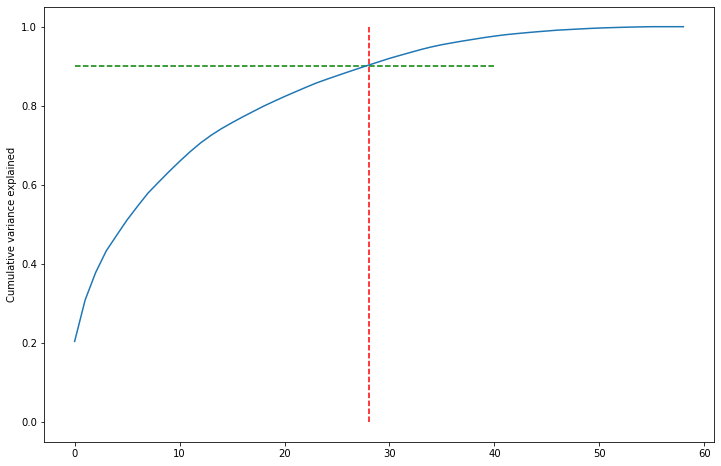

In [53]:
fig = plt.figure(figsize=[12,8])
plt.vlines(x=28, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.90, xmax=40, xmin=0, colors="g", linestyles="--")
plt.plot(var_cumu)
plt.ylabel("Cumulative variance explained")
plt.show()

In [54]:
from sklearn.decomposition import IncrementalPCA

In [55]:
pca_final = IncrementalPCA(n_components=28)

In [56]:
df_train_pca = pca_final.fit_transform(X_train)

In [57]:
df_train_pca.shape

(69999, 28)

In [58]:
corrmat = np.corrcoef(df_train_pca.transpose())

In [59]:
corrmat.shape

(28, 28)

<AxesSubplot:>

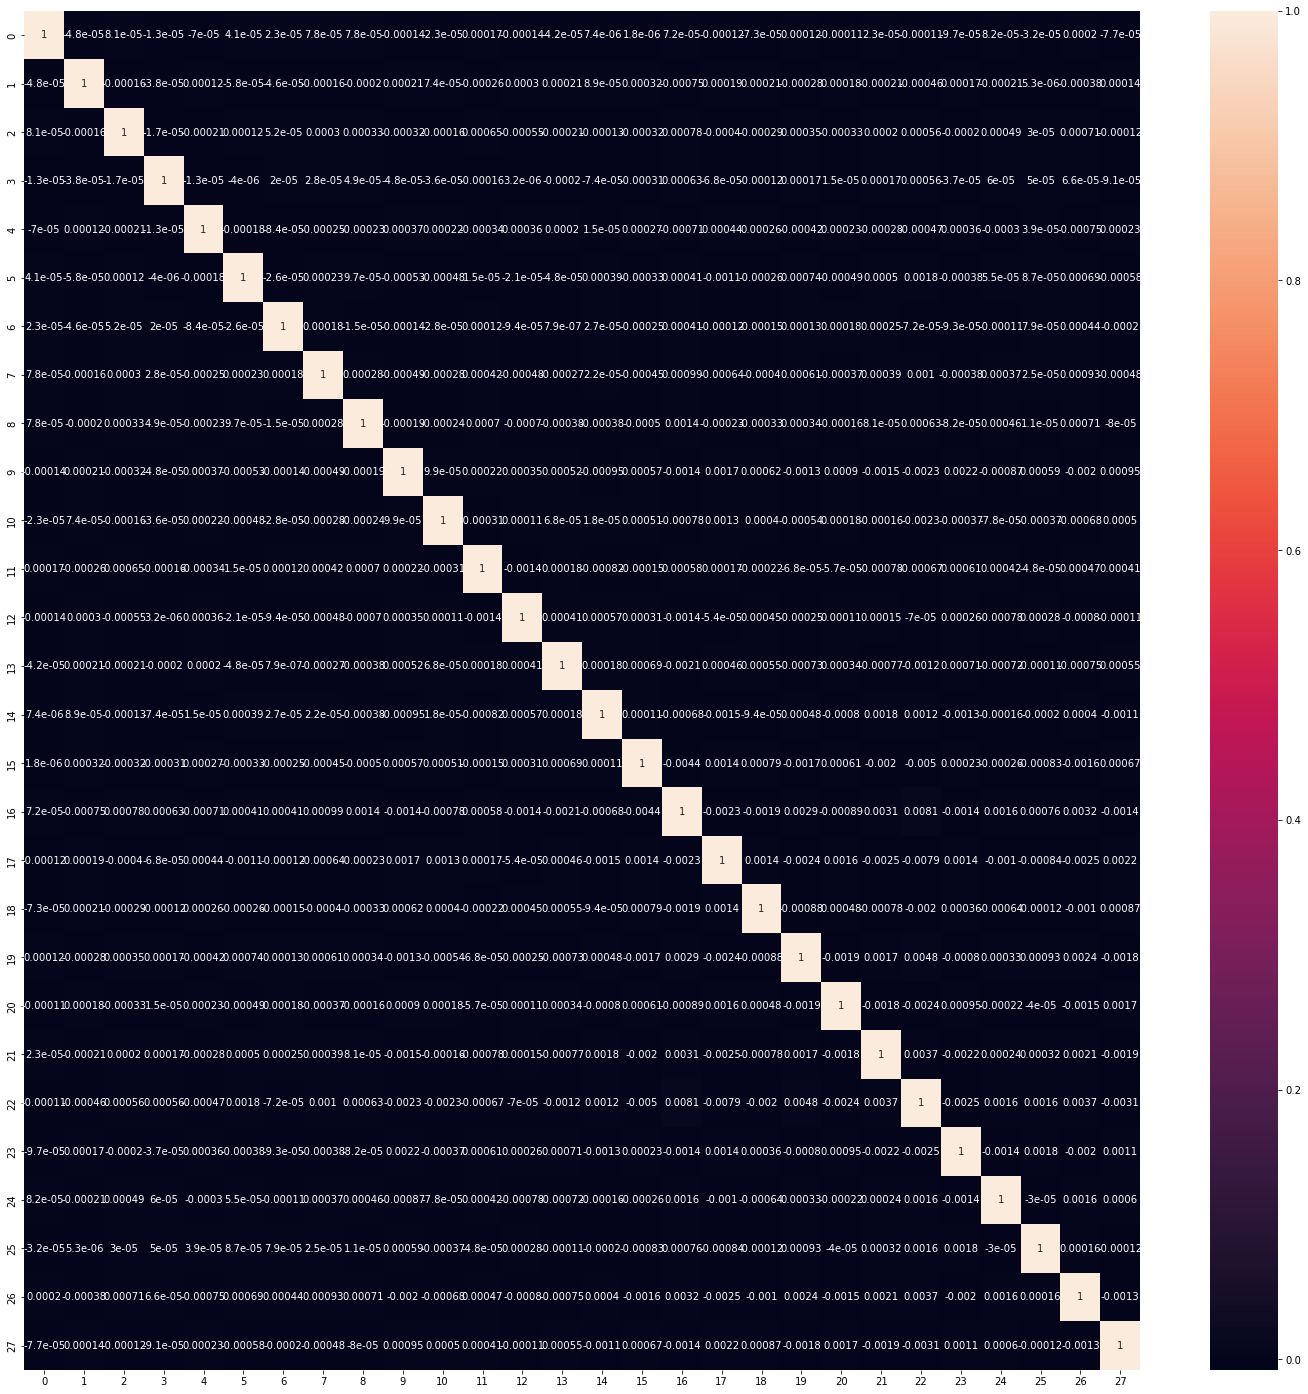

In [60]:
plt.figure(figsize=[25,25])
sns.heatmap(corrmat, annot=True)

In [61]:
df_test_pca = pca_final.transform(X_test)
df_test_pca.shape

(30000, 28)

In [62]:
from sklearn.linear_model import LogisticRegression

In [63]:
learner_pca = LogisticRegression()

In [64]:
model_pca = learner_pca.fit(df_train_pca, y_train)

In [65]:
round(model_pca.score(df_train_pca, y_train) * 100, 2)

93.66

In [66]:
y_pred = learner_pca.predict_proba(df_train_pca)
y_pred_df = pd.DataFrame(y_pred)
y_pred_df = y_pred_df.iloc[:,[1]]
y_pred_df.head()

,1
0,0.036145
1,0.068346
2,0.052001
3,0.095022
4,0.090315


In [67]:
y_train_df = pd.DataFrame(y_train)
y_train_df.head()

,churn_probability
0,0
1,0
2,0
3,0
4,0


In [68]:
y_pred_final = pd.concat([y_train_df,y_pred_df], axis=1)
y_pred_final= y_pred_final.rename(columns={ 1 : 'Churn_Prob'})
y_pred_final.head()

,churn_probability,Churn_Prob
0,0,0.036145
1,0,0.068346
2,0,0.052001
3,0,0.095022
4,0,0.090315


In [69]:
# Creating new column 'Predicted' with 1 if Converted_Prob > 0.5 else 0
y_pred_final['Predicted'] = y_pred_final.Churn_Prob.apply( lambda x: 1 if x > 0.5 else 0)
# Let's see the head
y_pred_final.head()

,churn_probability,Churn_Prob,Predicted
0,0,0.036145,0
1,0,0.068346,0
2,0,0.052001,0
3,0,0.095022,0
4,0,0.090315,0


In [70]:
for i in range(10):
    y_pred_final[i/10]= y_pred_final.Churn_Prob.map(lambda x: 1 if (x > (i/10)) else 0)
y_pred_final.head()

,churn_probability,Churn_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.036145,0,1,0,0,0,0,0,0,0,0,0
1,0,0.068346,0,1,0,0,0,0,0,0,0,0,0
2,0,0.052001,0,1,0,0,0,0,0,0,0,0,0
3,0,0.095022,0,1,0,0,0,0,0,0,0,0,0
4,0,0.090315,0,1,0,0,0,0,0,0,0,0,0


In [71]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [72]:
def print_score(y_pred_final):
    '''
    print the accuracy score and confusion matrix
    '''
    '''
    training performance
    '''
    print("Train Result:\n")
    print("accuracy score: {0:.4f}\n".format(round(metrics.accuracy_score(y_pred_final.churn_probability, y_pred_final.Predicted), 4) * 100))
    confusion = metrics.confusion_matrix(y_pred_final.churn_probability, y_pred_final.Predicted)
    print("Confusion Matrix: \n {}\n".format(confusion))
    TP = confusion[1,1] # true positive 
    TN = confusion[0,0] # true negatives
    FP = confusion[0,1] # false positives
    FN = confusion[1,0] # false negatives
    print("Sensitivity: {0:.4f}\n".format(round(TP / float(TP+FN), 4) * 100))
    print("Specificity: {0:.4f}\n".format(round(TN / float(TN+FP), 4) * 100))
    print("False Positive Rate : {0:.4f}\n".format(round(FP/ float(TN+FP), 4) * 100))
    print("Positive Predictive Value : {0:.4f}\n".format(round(TP / float(TP+FP), 4)* 100))
    print("Negative Predictive Value : {0:.4f}\n".format(round(TN / float(TN+ FN), 4) * 100))
    print("Precision : {0:.4f}\n".format(round(TP / float(TP+ FP), 4) * 100))
    print("Recall : {0:.4f}\n".format(round(TP / float(TP+ FN), 4) * 100))

In [73]:
def print_cutoffmatrix(y_pred_final):
    cutoffmatrix_df = pd.DataFrame( columns = ['Probability','Accuracy','Sensitivity','Specificity','Precision','Recall'])

    num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
    for i in num:
        cm = metrics.confusion_matrix(y_pred_final.churn_probability, y_pred_final[i] )
        total1=sum(sum(cm))
        Accuracy = (cm[0,0] + cm[1,1]) / total1
        Specificity = cm[0,0] / (cm[0,0] + cm[0,1])
        Sensitivity = cm[1,1] / (cm[1,0] + cm[1,1])
        Precision = precision_score(y_pred_final.churn_probability, y_pred_final[i])
        Recall = recall_score(y_pred_final.churn_probability, y_pred_final[i])
        cutoffmatrix_df.loc[i] =[i, Accuracy, Sensitivity, Specificity, Precision, Recall]

    print(cutoffmatrix_df)

    cutoffmatrix_df.plot.line(x='Probability', y=['Accuracy','Sensitivity','Specificity'])
    plt.show()

Train Result:

accuracy score: 93.6600

Confusion Matrix: 
 [[61491  1376]
 [ 3061  4071]]

Sensitivity: 57.0800

Specificity: 97.8100

False Positive Rate : 2.1900

Positive Predictive Value : 74.7400

Negative Predictive Value : 95.2600

Precision : 74.7400

Recall : 57.0800



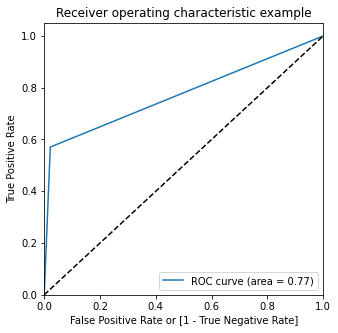

     Probability  Accuracy  Sensitivity  Specificity  Precision    Recall
0.0          0.0  0.101887     1.000000     0.000000   0.101887  1.000000
0.1          0.1  0.892384     0.785474     0.904513   0.482723  0.785474
0.2          0.2  0.931770     0.679192     0.960424   0.660666  0.679192
0.3          0.3  0.936513     0.636007     0.970605   0.710526  0.636007
0.4          0.4  0.937813     0.611189     0.974868   0.733962  0.611189
0.5          0.5  0.936613     0.570808     0.978113   0.747384  0.570808
0.6          0.6  0.933170     0.511217     0.981039   0.753617  0.511217
0.7          0.7  0.926313     0.408581     0.985048   0.756098  0.408581
0.8          0.8  0.913184     0.226444     0.991092   0.742529  0.226444
0.9          0.9  0.900727     0.038418     0.998552   0.750685  0.038418


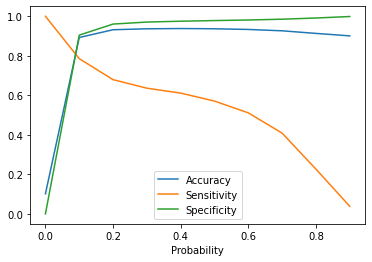

In [74]:
print_score(y_pred_final)
draw_roc(y_pred_final.churn_probability, y_pred_final.Predicted)
print_cutoffmatrix(y_pred_final)

In [75]:
## 0.10 is optimal value
y_pred_final['Predicted'] = y_pred_final.Churn_Prob.map( lambda x: 1 if x > 0.1 else 0)
y_pred_final.head()

,churn_probability,Churn_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.036145,0,1,0,0,0,0,0,0,0,0,0
1,0,0.068346,0,1,0,0,0,0,0,0,0,0,0
2,0,0.052001,0,1,0,0,0,0,0,0,0,0,0
3,0,0.095022,0,1,0,0,0,0,0,0,0,0,0
4,0,0.090315,0,1,0,0,0,0,0,0,0,0,0


In [76]:
print_score(y_pred_final)

Train Result:

accuracy score: 89.2400

Confusion Matrix: 
 [[56864  6003]
 [ 1530  5602]]

Sensitivity: 78.5500

Specificity: 90.4500

False Positive Rate : 9.5500

Positive Predictive Value : 48.2700

Negative Predictive Value : 97.3800

Precision : 48.2700

Recall : 78.5500



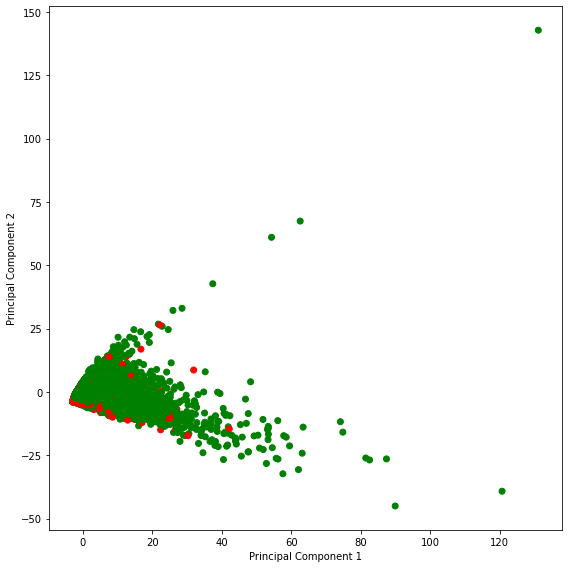

In [77]:
%matplotlib inline
fig = plt.figure(figsize = (8,8))
plt.scatter(df_train_pca[:,0], df_train_pca[:,1], c = y_train.map({0:'green',1:'red'}))
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.tight_layout()
plt.show()

In [78]:
y_test_pred = model_pca.predict_proba(df_test_pca)

In [79]:
# Convert y_test_pred to a dataframe
y_test_pred_df = pd.DataFrame(y_test_pred)
y_test_pred_df = y_test_pred_df.iloc[:,[1]]
y_test_pred_df.head()

,1
0,0.000000e+00
1,0.000000e+00
2,3.169790e-275
3,1.046601e-292
4,1.991122e-242


In [80]:
y_test_pred_final = pd.concat([X_test['id'],y_test_pred_df[1]], axis=1)
y_test_pred_final= y_test_pred_final.rename(columns={ 1 : 'Churn_Prob'})
y_test_pred_final['churn_probability'] = y_test_pred_final.Churn_Prob.map( lambda x: 1 if x > 0.10 else 0)
y_test_pred_final.head()

,id,Churn_Prob,churn_probability
0,69999,0.000000e+00,0
1,70000,0.000000e+00,0
2,70001,3.169790e-275,0
3,70002,1.046601e-292,0
4,70003,1.991122e-242,0


In [81]:
y_test_final_pca = y_test_pred_final[['id','churn_probability']]
y_test_final_pca.to_csv('submission_pca.csv',index=False)

In [82]:
y_test_final_pca['churn_probability'].sum()/y_test_final_pca['churn_probability'].count()

0.007833333333333333

In [83]:
#PCA Again

In [84]:
pca_again = PCA(0.9)

In [85]:
df_train_pca2 = pca_again.fit_transform(X_train)

In [86]:
df_train_pca2.shape

(69999, 29)

In [87]:
learner_pca2 = LogisticRegression()

In [88]:
model_pca2 = learner_pca2.fit(df_train_pca2, y_train)

In [89]:
round(model_pca2.score(df_train_pca2, y_train) * 100, 2)

93.64

In [90]:
df_test_pca2 = pca_again.transform(X_test)

In [91]:
df_test_pca2.shape

(30000, 29)

In [92]:
y_pred = learner_pca2.predict_proba(df_train_pca2)
y_pred_df = pd.DataFrame(y_pred)
y_pred_df = y_pred_df.iloc[:,[1]]
y_pred_df.head()

,1
0,0.035661
1,0.063728
2,0.051991
3,0.091768
4,0.080020


In [93]:
y_pred_final = pd.concat([y_train_df,y_pred_df], axis=1)
y_pred_final= y_pred_final.rename(columns={ 1 : 'Churn_Prob'})
y_pred_final.head()

,churn_probability,Churn_Prob
0,0,0.035661
1,0,0.063728
2,0,0.051991
3,0,0.091768
4,0,0.080020


In [94]:
# Creating new column 'Predicted' with 1 if Converted_Prob > 0.5 else 0
y_pred_final['Predicted'] = y_pred_final.Churn_Prob.apply( lambda x: 1 if x > 0.5 else 0)
# Let's see the head
y_pred_final.head()

,churn_probability,Churn_Prob,Predicted
0,0,0.035661,0
1,0,0.063728,0
2,0,0.051991,0
3,0,0.091768,0
4,0,0.080020,0


In [95]:
for i in range(10):
    y_pred_final[i/10]= y_pred_final.Churn_Prob.map(lambda x: 1 if (x > (i/10)) else 0)
y_pred_final.head()

,churn_probability,Churn_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.035661,0,1,0,0,0,0,0,0,0,0,0
1,0,0.063728,0,1,0,0,0,0,0,0,0,0,0
2,0,0.051991,0,1,0,0,0,0,0,0,0,0,0
3,0,0.091768,0,1,0,0,0,0,0,0,0,0,0
4,0,0.080020,0,1,0,0,0,0,0,0,0,0,0


Train Result:

accuracy score: 93.6400

Confusion Matrix: 
 [[61475  1392]
 [ 3058  4074]]

Sensitivity: 57.1200

Specificity: 97.7900

False Positive Rate : 2.2100

Positive Predictive Value : 74.5300

Negative Predictive Value : 95.2600

Precision : 74.5300

Recall : 57.1200



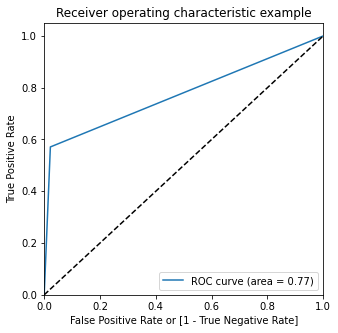

     Probability  Accuracy  Sensitivity  Specificity  Precision    Recall
0.0          0.0  0.101887     1.000000     0.000000   0.101887  1.000000
0.1          0.1  0.891227     0.788138     0.902922   0.479444  0.788138
0.2          0.2  0.931585     0.680735     0.960043   0.659020  0.680735
0.3          0.3  0.936528     0.635726     0.970652   0.710770  0.635726
0.4          0.4  0.937713     0.610208     0.974868   0.733648  0.610208
0.5          0.5  0.936428     0.571228     0.977858   0.745335  0.571228
0.6          0.6  0.933085     0.509955     0.981087   0.753626  0.509955
0.7          0.7  0.926628     0.409983     0.985239   0.759086  0.409983
0.8          0.8  0.913199     0.227566     0.990981   0.741096  0.227566
0.9          0.9  0.900499     0.036175     0.998552   0.739255  0.036175


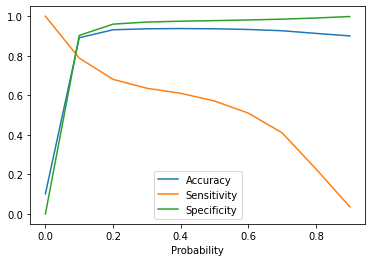

In [96]:
print_score(y_pred_final)
draw_roc(y_pred_final.churn_probability, y_pred_final.Predicted)
print_cutoffmatrix(y_pred_final)

In [97]:
## 0.10 is optimal value
y_pred_final['Predicted'] = y_pred_final.Churn_Prob.map( lambda x: 1 if x > 0.1 else 0)
y_pred_final.head()

,churn_probability,Churn_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.035661,0,1,0,0,0,0,0,0,0,0,0
1,0,0.063728,0,1,0,0,0,0,0,0,0,0,0
2,0,0.051991,0,1,0,0,0,0,0,0,0,0,0
3,0,0.091768,0,1,0,0,0,0,0,0,0,0,0
4,0,0.080020,0,1,0,0,0,0,0,0,0,0,0


In [98]:
print_score(y_pred_final)

Train Result:

accuracy score: 89.1200

Confusion Matrix: 
 [[56764  6103]
 [ 1511  5621]]

Sensitivity: 78.8100

Specificity: 90.2900

False Positive Rate : 9.7100

Positive Predictive Value : 47.9400

Negative Predictive Value : 97.4100

Precision : 47.9400

Recall : 78.8100



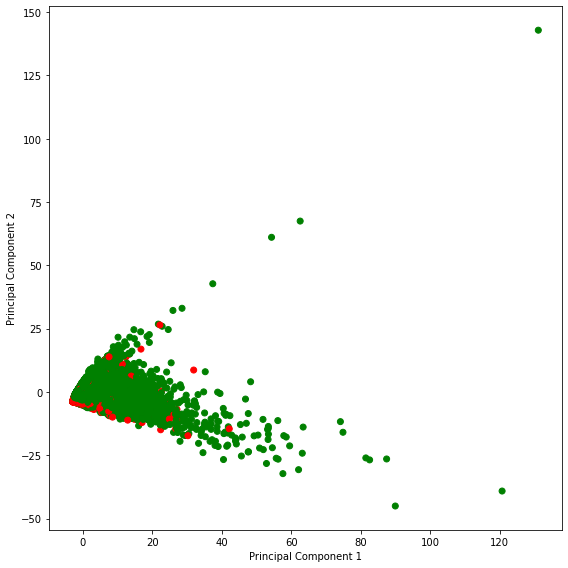

In [99]:
%matplotlib inline
fig = plt.figure(figsize = (8,8))
plt.scatter(df_train_pca2[:,0], df_train_pca2[:,1], c = y_train.map({0:'green',1:'red'}))
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.tight_layout()
plt.show()

In [100]:
y_test_pred = model_pca2.predict_proba(df_test_pca2)

In [101]:
# Convert y_test_pred to a dataframe
y_test_pred_df = pd.DataFrame(y_test_pred)
y_test_pred_df = y_test_pred_df.iloc[:,[1]]
y_test_pred_df.head()

,1
0,4.037596e-155
1,0.000000e+00
2,3.567255e-70
3,2.337471e-97
4,2.740129e-77


In [103]:
y_test_pred_final = pd.concat([X_test['id'],y_test_pred_df[1]], axis=1)
y_test_pred_final= y_test_pred_final.rename(columns={ 1 : 'Churn_Prob'})
y_test_pred_final['churn_probability'] = y_test_pred_final.Churn_Prob.map( lambda x: 1 if x > 0.10 else 0)
y_test_pred_final.head()

,id,Churn_Prob,churn_probability
0,69999,4.037596e-155,0
1,70000,0.000000e+00,0
2,70001,3.567255e-70,0
3,70002,2.337471e-97,0
4,70003,2.740129e-77,0


In [104]:
y_test_final_pca2 = y_test_pred_final[['id','churn_probability']]
y_test_final_pca2.to_csv('submission_pca2.csv',index=False)

In [105]:
y_test_final_pca2['churn_probability'].sum()/y_test_final_pca2['churn_probability'].count()

0.27253333333333335

In [106]:
#Decision Tree

In [107]:
clf = DecisionTreeClassifier(random_state=42,max_depth=5)

In [108]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [109]:
def print_classification_score(clf, X_train, y_train,train=True):
    '''
    print the accuracy score, classification report and confusion matrix of classifier
    '''
    if train:
        '''
        training performance
        '''
        print("Train Result:\n")
        print("accuracy score: {0:.4f}\n".format(accuracy_score(y_train, clf.predict(X_train))))
        print("Classification Report: \n {}\n".format(classification_report(y_train, clf.predict(X_train))))
        print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_train, clf.predict(X_train))))

        res = cross_val_score(clf, X_train, y_train, cv=5, scoring='accuracy')
        print("Average Accuracy: \t {0:.4f}".format(np.mean(res)))
        print("Accuracy SD: \t\t {0:.4f}".format(np.std(res)))
 

In [110]:
print_classification_score(clf, X_train, y_train,True)

Train Result:

accuracy score: 0.9424

Classification Report: 
               precision    recall  f1-score   support

           0       0.96      0.98      0.97     62867
           1       0.77      0.61      0.68      7132

    accuracy                           0.94     69999
   macro avg       0.87      0.80      0.83     69999
weighted avg       0.94      0.94      0.94     69999


Confusion Matrix: 
 [[61596  1271]
 [ 2762  4370]]

Average Accuracy: 	 0.8352
Accuracy SD: 		 0.2120


In [111]:
bag_clf = BaggingClassifier(base_estimator=clf, n_estimators=100,
                            bootstrap=True, n_jobs=-1,
                            random_state=42)

In [112]:
bag_clf.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=5,
                                                        random_state=42),
                  n_estimators=100, n_jobs=-1, random_state=42)

In [113]:
print_classification_score(bag_clf, X_train, y_train,True)

Train Result:

accuracy score: 0.9426

Classification Report: 
               precision    recall  f1-score   support

           0       0.96      0.98      0.97     62867
           1       0.78      0.61      0.68      7132

    accuracy                           0.94     69999
   macro avg       0.87      0.79      0.83     69999
weighted avg       0.94      0.94      0.94     69999


Confusion Matrix: 
 [[61640  1227]
 [ 2792  4340]]

Average Accuracy: 	 0.9418
Accuracy SD: 		 0.0005


In [114]:
#oob_score=True
bag_clf = BaggingClassifier(base_estimator=clf, n_estimators=100,
                            bootstrap=True, oob_score=True,
                            n_jobs=-1, random_state=42)

In [115]:
bag_clf.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=5,
                                                        random_state=42),
                  n_estimators=100, n_jobs=-1, oob_score=True, random_state=42)

In [116]:
bag_clf.oob_score_

0.9418991699881427

In [117]:
print_classification_score(bag_clf, X_train, y_train,train=True)

Train Result:

accuracy score: 0.9426

Classification Report: 
               precision    recall  f1-score   support

           0       0.96      0.98      0.97     62867
           1       0.78      0.61      0.68      7132

    accuracy                           0.94     69999
   macro avg       0.87      0.79      0.83     69999
weighted avg       0.94      0.94      0.94     69999


Confusion Matrix: 
 [[61640  1227]
 [ 2792  4340]]

Average Accuracy: 	 0.9418
Accuracy SD: 		 0.0005


In [118]:
#XGBoost

In [119]:
!pip install xgboost

In [120]:
import xgboost as xgb

In [121]:
xgb_clf = xgb.XGBClassifier(max_depth=7, n_estimators=300, learning_rate=0.3,
                            n_jobs=-1, verbosity=1, gpu_id=0)

In [122]:
xgb_clf.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=0, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.3, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=7, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=300,
              n_jobs=-1, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [134]:
print_classification_score(xgb_clf, X_train, y_train, True)

Train Result:

accuracy score: 0.9982

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     62867
           1       0.99      0.99      0.99      7132

    accuracy                           1.00     69999
   macro avg       0.99      1.00      1.00     69999
weighted avg       1.00      1.00      1.00     69999


Confusion Matrix: 
 [[62798    69]
 [   59  7073]]

Average Accuracy: 	 0.9246
Accuracy SD: 		 0.0215


Train Result:

accuracy score: 99.8200

Confusion Matrix: 
 [[62798    69]
 [   59  7073]]

Sensitivity: 99.1700

Specificity: 99.8900

False Positive Rate : 0.1100

Positive Predictive Value : 99.0300

Negative Predictive Value : 99.9100

Precision : 99.0300

Recall : 99.1700



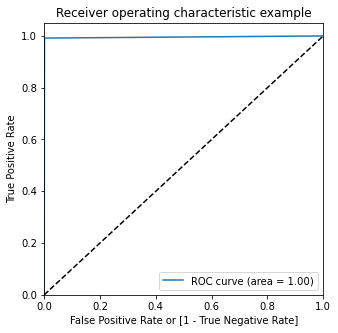

     Probability  Accuracy  Sensitivity  Specificity  Precision    Recall
0.0          0.0  0.101887     1.000000     0.000000   0.101887  1.000000
0.1          0.1  0.977643     1.000000     0.975106   0.820053  1.000000
0.2          0.2  0.990900     0.999860     0.989883   0.918115  0.999860
0.3          0.3  0.995443     0.998598     0.995085   0.958417  0.998598
0.4          0.4  0.997586     0.997056     0.997646   0.979612  0.997056
0.5          0.5  0.998171     0.991727     0.998902   0.990339  0.991727
0.6          0.6  0.997600     0.980931     0.999491   0.995447  0.980931
0.7          0.7  0.994686     0.949383     0.999825   0.998378  0.949383
0.8          0.8  0.985628     0.859086     0.999984   0.999837  0.859086
0.9          0.9  0.959857     0.606141     0.999984   0.999769  0.606141


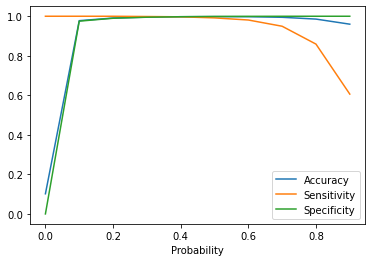

In [137]:
y_pred = xgb_clf.predict_proba(X_train)
y_pred_df = pd.DataFrame(y_pred)
y_pred_df = y_pred_df.iloc[:,[1]]
y_pred_final = pd.concat([y_train_df,y_pred_df], axis=1)
y_pred_final= y_pred_final.rename(columns={ 1 : 'Churn_Prob'})
# Creating new column 'Predicted' with 1 if Converted_Prob > 0.5 else 0
y_pred_final['Predicted'] = y_pred_final.Churn_Prob.apply( lambda x: 1 if x > 0.5 else 0)
# Let's see the head
for i in range(10):
    y_pred_final[i/10]= y_pred_final.Churn_Prob.map(lambda x: 1 if (x > (i/10)) else 0)
print_score(y_pred_final)
draw_roc(y_pred_final.churn_probability, y_pred_final.Predicted)
print_cutoffmatrix(y_pred_final)

In [138]:
## 0.10 is optimal value
y_pred_final['Predicted'] = y_pred_final.Churn_Prob.map( lambda x: 1 if x > 0.1 else 0)
print_score(y_pred_final)

Train Result:

accuracy score: 97.7600

Confusion Matrix: 
 [[61302  1565]
 [    0  7132]]

Sensitivity: 100.0000

Specificity: 97.5100

False Positive Rate : 2.4900

Positive Predictive Value : 82.0100

Negative Predictive Value : 100.0000

Precision : 82.0100

Recall : 100.0000



In [139]:
y_test_pred = xgb_clf.predict_proba(X_test)
# Convert y_test_pred to a dataframe
y_test_pred_df = pd.DataFrame(y_test_pred)
y_test_pred_df = y_test_pred_df.iloc[:,[1]]
y_test_pred_final = pd.concat([X_test['id'],y_test_pred_df[1]], axis=1)
y_test_pred_final= y_test_pred_final.rename(columns={ 1 : 'Churn_Prob'})
y_test_pred_final['churn_probability'] = y_test_pred_final.Churn_Prob.map( lambda x: 1 if x > 0.10 else 0)

In [140]:
y_test_final_xgb = y_test_pred_final[['id','churn_probability']]
y_test_final_xgb.to_csv('submission_xgb.csv',index=False)

In [141]:
y_test_final_xgb['churn_probability'].sum()/y_test_final_xgb['churn_probability'].count()

0.005166666666666667

In [ ]:
#To do
#Logistic Regresion -- Priyesh
#Univariate and Bivariate -- Priyesh
#Xgboost -- Priyesh
#submit score kaggle -- Priyesh
#Comments -- Chandra
#Decision Tree -- Chandra
#Random Forest -- Chandra
#SMOTE Analysis -- Chandra